# Vodafone COPS. Univariate Analysis

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

sns.set_style('white')

plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## Data loading

In [23]:
dtypes = {
    'billing_cycle_id': 'int',
    'data_plan_c': 'object',
    'voice_plan_c': 'object',
    'promo_code_vf': 'object',
    'promo_code_tarif': 'object', 
    'zip_code': 'object',
    'region_code': 'object',
    'gender': 'object', 
    'type_ident': 'object', 
    'nationality': 'object',
    'n_lines': 'float', 
    'n_lines_pre': 'float',
    'n_lines_post': 'float',
    'age': 'float', 
    'months_to_end_promo_tarif': 'float',
    'months_to_end_promo_vf': 'float',
    'voice_plan_change': 'int',
    'data_plan_change': 'int',
    'n_calls_billing_c': 'int',
    'n_calls_billing_c_minus_1': 'int',
    'n_calls_churn_c': 'int',
    'n_calls_churn_c_minus_1': 'int', 
    'n_calls_tariff_c': 'int',
    'n_calls_tariff_c_minus_1': 'int',
    'n_calls_dsl_inc_c': 'int',
    'n_calls_dsl_inc_c_minus_1': 'int',
    'n_calls_mobile_inc_c': 'int',
    'n_calls_mobile_inc_c_minus_1': 'int', 
    'n_calls_device_upgr_c': 'int',
    'n_calls_device_upgr_c_minus_1': 'int',
    'n_calls_device_del_rep_c': 'int',
    'n_calls_device_del_rep_c_minus_1':'int',
    'n_calls_new_adds_c': 'int',
    'n_calls_new_adds_c_minus_1': 'int',
    'n_calls_ser_man_c': 'int',
    'n_calls_ser_man_c_minus_1': 'int',
    'label': 'int'
}

string_cols_imput_null = ['data_plan_c', 'voice_plan_c', 'promo_code_vf', 'promo_code_tarif', 'zip_code', 'region_code',
                          'gender', 'type_ident', 'nationality']

numeric_cols_imput_mean = ['n_lines', 'n_lines_pre', 'n_lines_post', 'age', 'months_to_end_promo_tarif', 
                           'months_to_end_promo_vf']

numeric_cols_imput_zero = ['voice_plan_change', 'data_plan_change', 'n_calls_billing_c', 'n_calls_billing_c_minus_1', 
                           'n_calls_churn_c', 'n_calls_churn_c_minus_1', 'n_calls_tariff_c', 'n_calls_tariff_c_minus_1', 
                           'n_calls_dsl_inc_c', 'n_calls_dsl_inc_c_minus_1', 'n_calls_mobile_inc_c', 
                           'n_calls_mobile_inc_c_minus_1', 'n_calls_device_upgr_c', 'n_calls_device_upgr_c_minus_1', 
                           'n_calls_device_del_rep_c', 'n_calls_device_del_rep_c_minus_1', 'n_calls_new_adds_c',
                           'n_calls_new_adds_c_minus_1', 'n_calls_ser_man_c', 'n_calls_ser_man_c_minus_1']

cols = string_cols_imput_null + numeric_cols_imput_mean + numeric_cols_imput_zero + ['label'] + ['billing_cycle_id']

train = pd.read_csv('../data/train.csv', dtype=dtypes, usecols=cols)

data = train.reset_index(drop=True)

print(data.shape)

(2427559, 37)


## Utilities

In [61]:
def plot_df_univariate(df, colname, backend='matplotlib'):
    df.index = df.index.map(str)
    if backend == 'matplotlib':
        y_left_label = 'Probability of making a billing related call in next cycle'
        y_right_label = 'Number of observations'
        ax = df['label', 'count'].plot(kind='bar', 
                                  legend=True,
                                  label=y_right_label, 
                                  color='#005379')
        ax.set_ylabel(y_right_label)
        ax2 = df['label', 'mean'].plot(legend=True,
                                 secondary_y=True, 
                                 title='Univariate plot for feature: {feature}'\
                                 .format(feature=colname), 
                                 label=y_left_label,
                                 rot=45 if len(df.index) > 10 else 0,
                                 marker='o',
                                 color='#d46235',
                                 xlim=ax.get_xlim())
        ax.set_xlabel(colname)        
        ax2.set_ylabel(y_left_label)
        plt.show()
    elif backend == 'bokeh':
        height = 300
        width = height * 2
        plot = figure(plot_width=width, plot_height=height)
        x_labels = df.index.values
        x_values = df['label', 'count'].values
        plot.vbar(x=x_labels, width=1, bottom=0, top=x_values, color='#005379')
        show(plot)

def plot_univariate_numerical(colname, minimum=None, maximum=None, n_bins=10):
    if minimum and not maximum:
        clipped_col = data[colname].clip_lower(minimum)
    elif not minimum and maximum:
        clipped_col = data[colname].clip_upper(maximum)
    elif minimum and maximum:
        clipped_col = data[colname].clip(minimum, maximum)
    else:
        clipped_col = data[colname]
    df = pd.concat([pd.cut(clipped_col, n_bins), data['label']], axis=1).groupby(colname).agg({'label':['mean', 'count']})
    plot_df_univariate(df, colname)
    return df

def plot_univariate_ordinal(colname, minimum=None, maximum=None):
    if minimum and not maximum:
        print('Hi')
        clipped_col = data[colname].clip_lower(minimum)
    elif not minimum and maximum:
        clipped_col = data[colname].clip_upper(maximum)
    elif minimum and maximum:
        clipped_col = data[colname].clip(minimum, maximum)
    else:
        clipped_col = data[colname]
    df = pd.concat([clipped_col, data['label']], axis=1).groupby(colname).agg({'label':['mean', 'count']})
    plot_df_univariate(df, colname)
    return df

def plot_univariate_categorical(colname, min_samples=None):
    df = data.groupby(colname).agg({'label':['mean', 'count']})
    if min_samples:
        df = df[df['label', 'count'] > min_samples]
    df = df.sort_values(('label', 'mean'), ascending=False)
    plot_df_univariate(df, colname)
    return df

## Univariate plots

### Ordinal features

#### Total number of lines

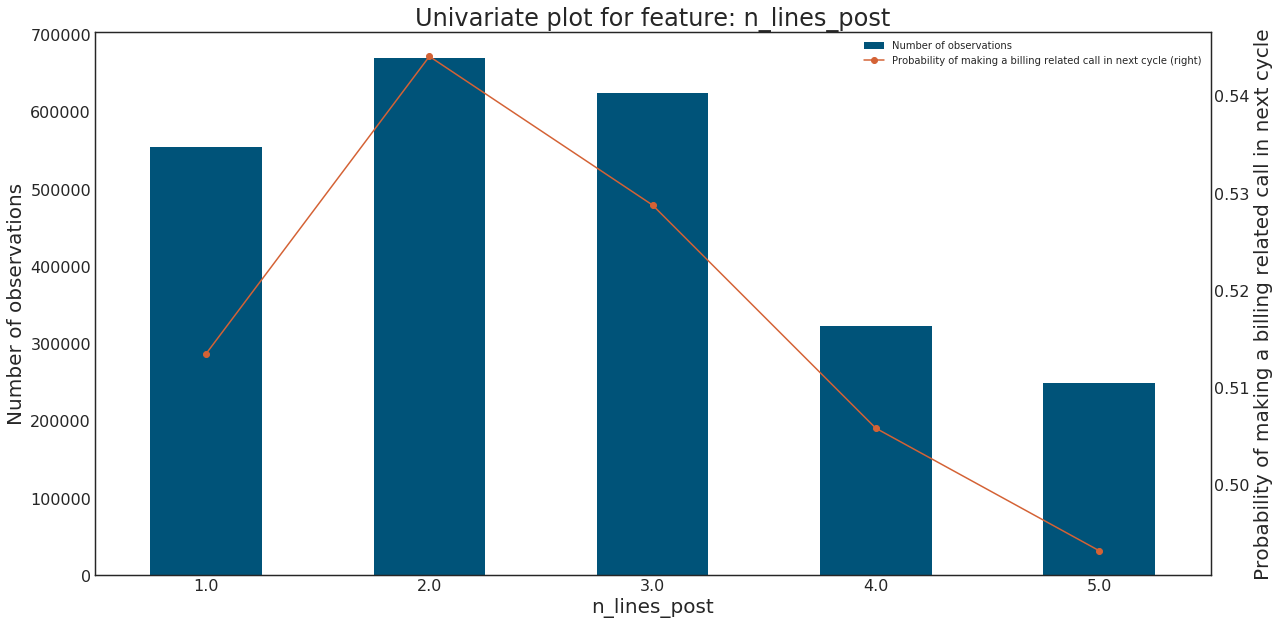

In [62]:
n_lines = plot_univariate_ordinal('n_lines_post', minimum=1.0, maximum=5.0)

In [26]:
n_lines

label        
                  mean   count
n_lines_post                  
1.0           0.513502  554366
2.0           0.544058  670372
3.0           0.528771  624915
4.0           0.505832  322534
5.0           0.493249  248477

#### Total number prepaid lines

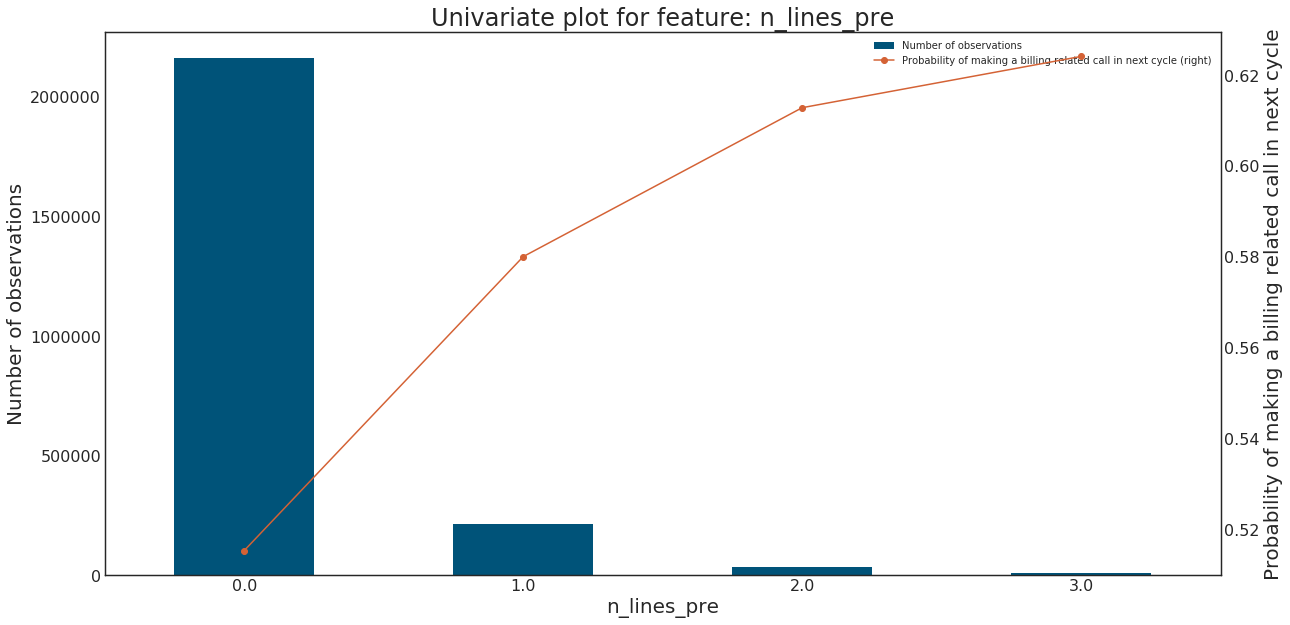

In [27]:
n_lines_pre = plot_univariate_ordinal('n_lines_pre', minimum=0.0, maximum=3.0)

In [28]:
n_lines_pre

label         
                 mean    count
n_lines_pre                   
0.0          0.515279  2163532
1.0          0.580010   212643
2.0          0.612810    34332
3.0          0.624102    10157

#### Total number postpaid lines

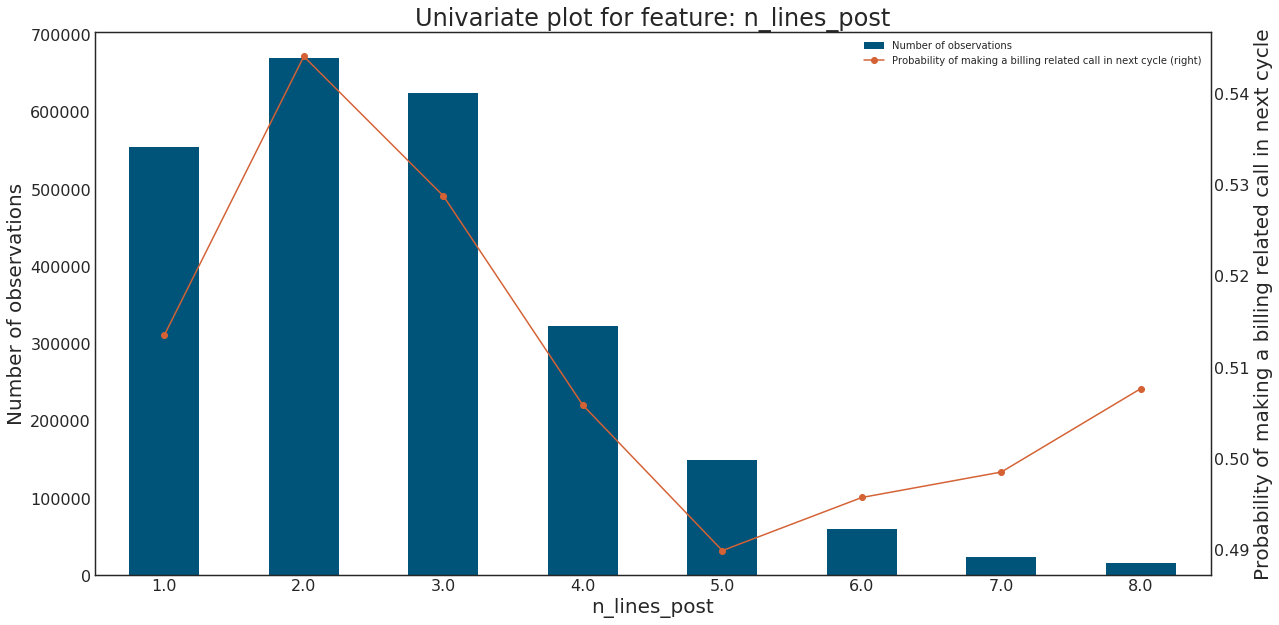

In [29]:
n_lines_post = plot_univariate_ordinal('n_lines_post', minimum=1.0, maximum=8.0)

In [30]:
n_lines_post

label        
                  mean   count
n_lines_post                  
1.0           0.513502  554366
2.0           0.544058  670372
3.0           0.528771  624915
4.0           0.505832  322534
5.0           0.489879  149435
6.0           0.495700   59415
7.0           0.498491   23198
8.0           0.507639   16429

#### Months to end promotion of type tarif

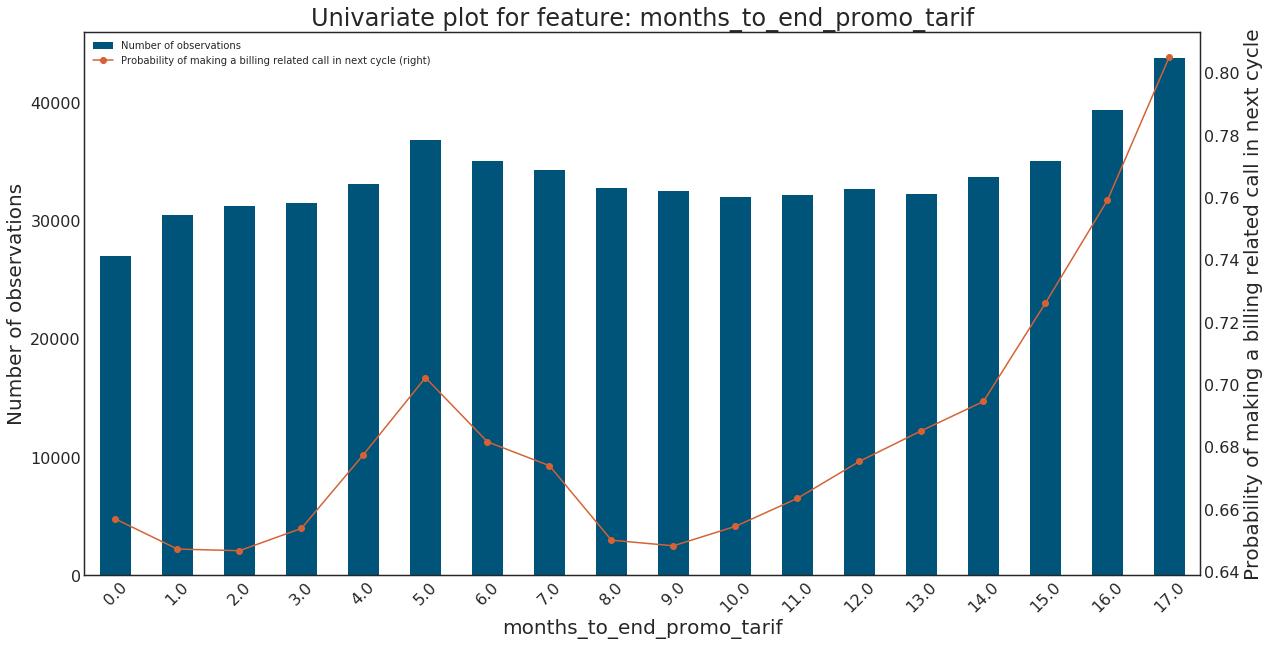

In [31]:
months_to_end_promo_tarif = plot_univariate_ordinal('months_to_end_promo_tarif', minimum=0.0, maximum=17.0)

In [32]:
months_to_end_promo_tarif

label       
                               mean  count
months_to_end_promo_tarif                 
0.0                        0.656885  27023
1.0                        0.647236  30519
2.0                        0.646713  31255
3.0                        0.653883  31498
4.0                        0.677548  33146
5.0                        0.702246  36819
6.0                        0.681655  35072
7.0                        0.673990  34272
8.0                        0.650090  32757
9.0                        0.648290  32487
10.0                       0.654528  32046
11.0                       0.663527  32169
12.0                       0.675391  32704
13.0                       0.685221  32229
14.0                       0.694611  33734
15.0                       0.726191  35050
16.0                       0.759184  39391
17.0                       0.805303  43786

#### Months to end promotion of type vf

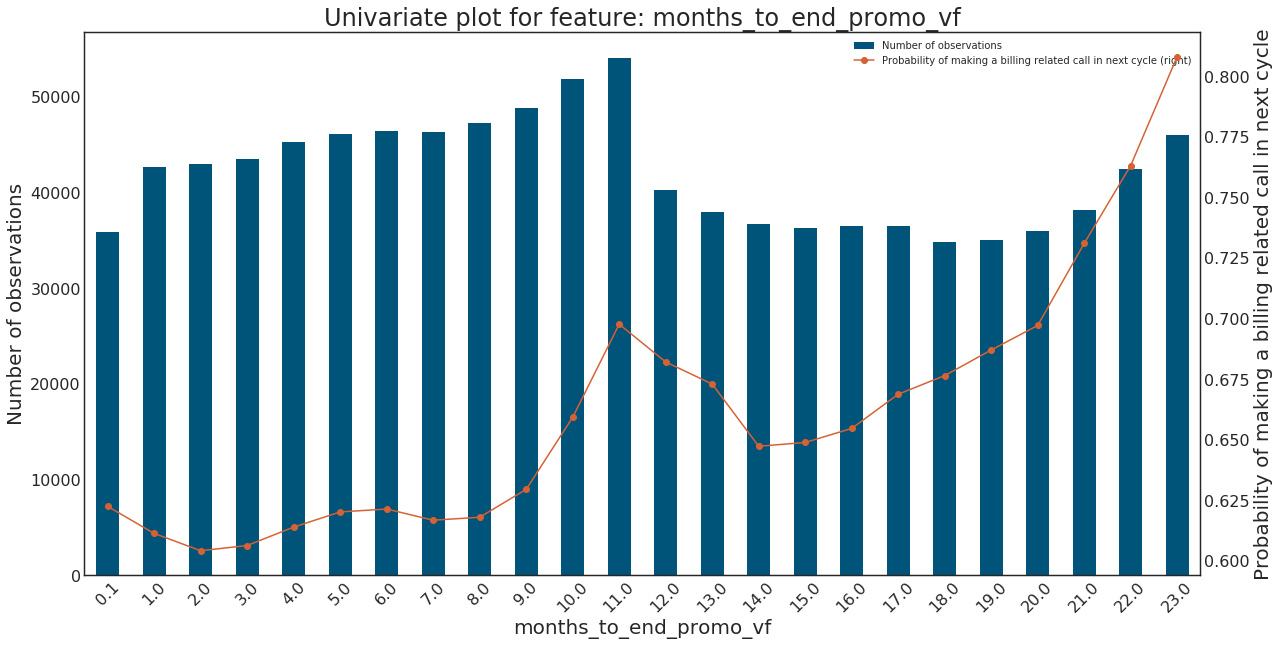

In [33]:
months_to_end_promo_vf = plot_univariate_ordinal('months_to_end_promo_vf', minimum=0.1, maximum=23.0)

In [34]:
months_to_end_promo_vf

label       
                            mean  count
months_to_end_promo_vf                 
0.1                     0.622520  35843
1.0                     0.611356  42638
2.0                     0.604240  42925
3.0                     0.606384  43512
4.0                     0.613987  45242
5.0                     0.620238  46071
6.0                     0.621428  46435
7.0                     0.616821  46336
8.0                     0.618048  47286
9.0                     0.629553  48787
10.0                    0.659310  51789
11.0                    0.697697  54065
12.0                    0.682122  40223
13.0                    0.672993  37987
14.0                    0.647336  36746
15.0                    0.648900  36229
16.0                    0.654695  36446
17.0                    0.668802  36522
18.0                    0.676497  34859
19.0                    0.687054  35038
20.0                    0.697185  35946
21.0                    0.731044  38181
22.0                    0.763160  42400
23.0                    0.808148  45999

#### Just changed voice plan

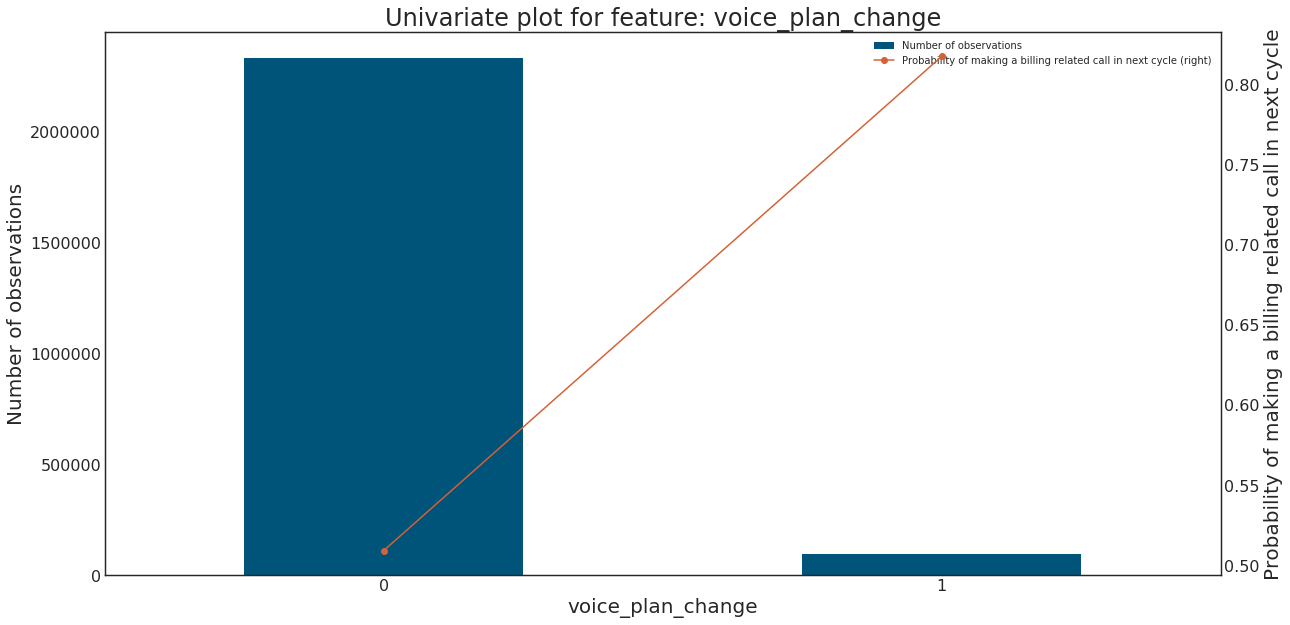

In [35]:
voice_plan_change = plot_univariate_ordinal('voice_plan_change')

In [36]:
voice_plan_change

label         
                       mean    count
voice_plan_change                   
0                  0.509029  2330771
1                  0.817725    96788

#### Just changed data plan

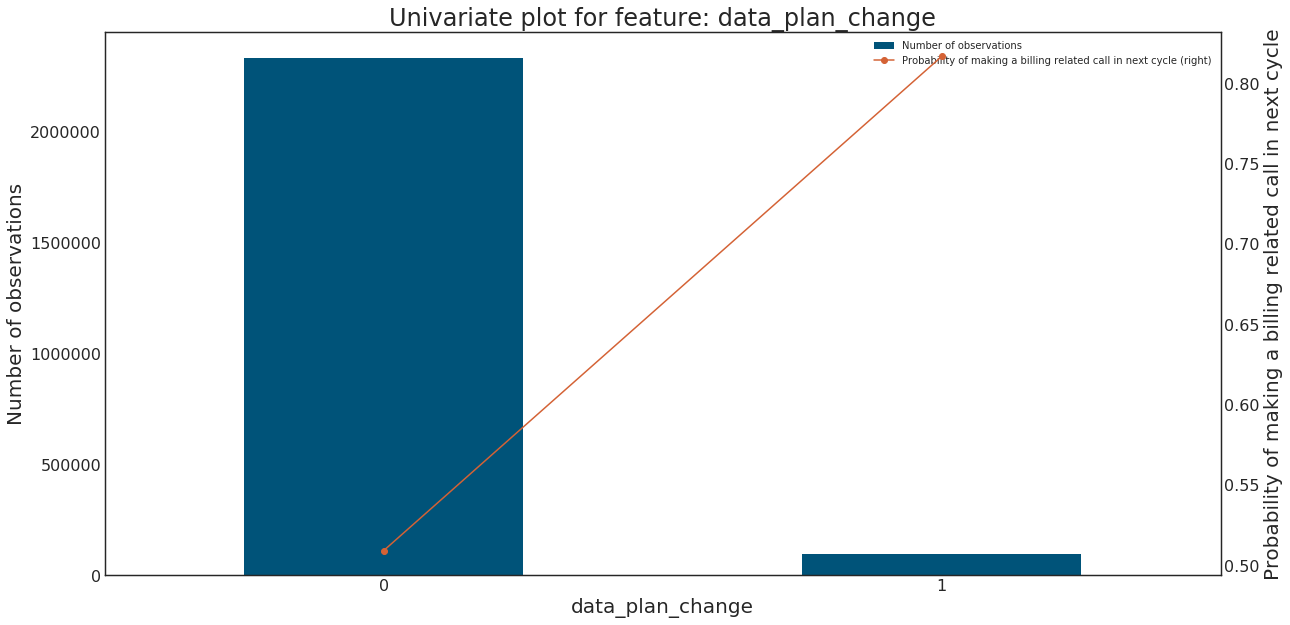

In [37]:
data_plan_change = plot_univariate_ordinal('data_plan_change')

In [38]:
data_plan_change

label         
                      mean    count
data_plan_change                   
0                 0.509085  2330883
1                 0.816728    96676

#### Number of calls for billing reasons in current cycle

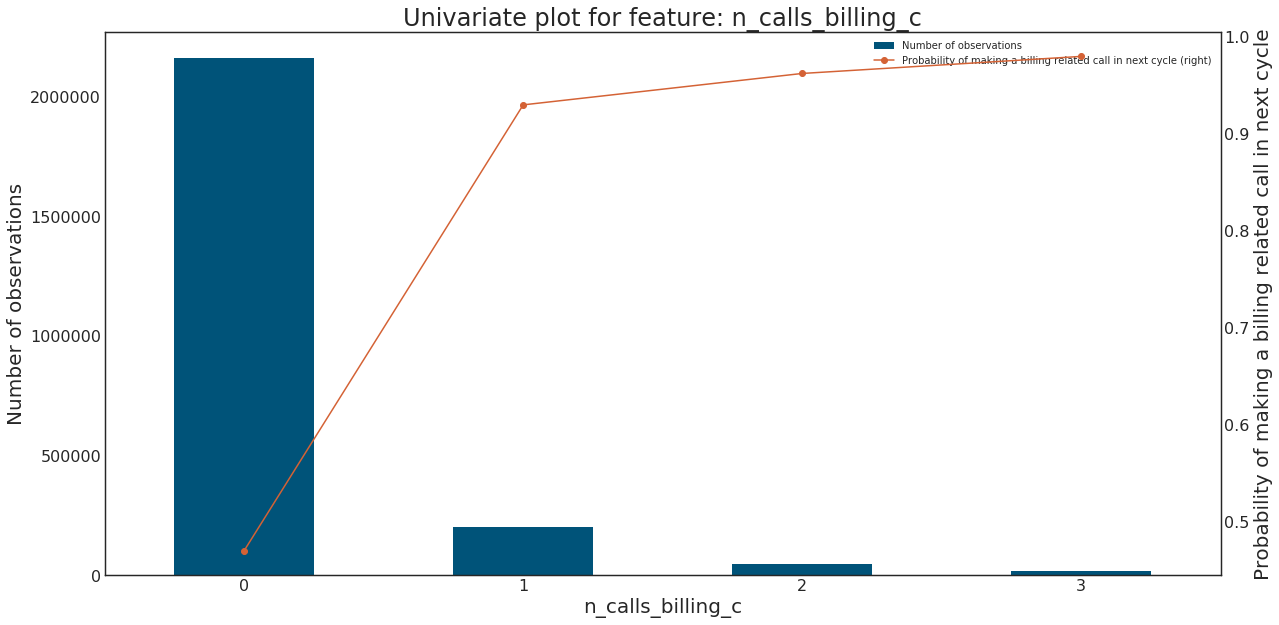

label         
                       mean    count
n_calls_billing_c                   
0                  0.470286  2162866
1                  0.929507   201125
2                  0.961874    45376
3                  0.979442    18192

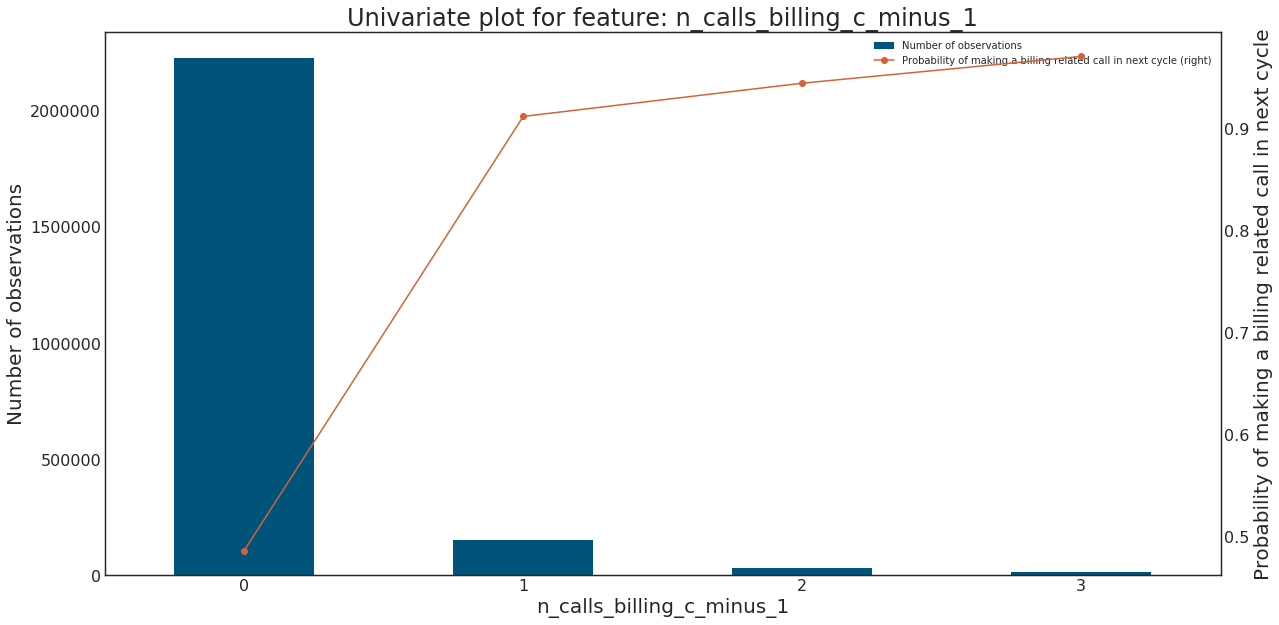

label         
                               mean    count
n_calls_billing_c_minus_1                   
0                          0.485841  2229365
1                          0.911533   153266
2                          0.944105    32203
3                          0.970373    12725

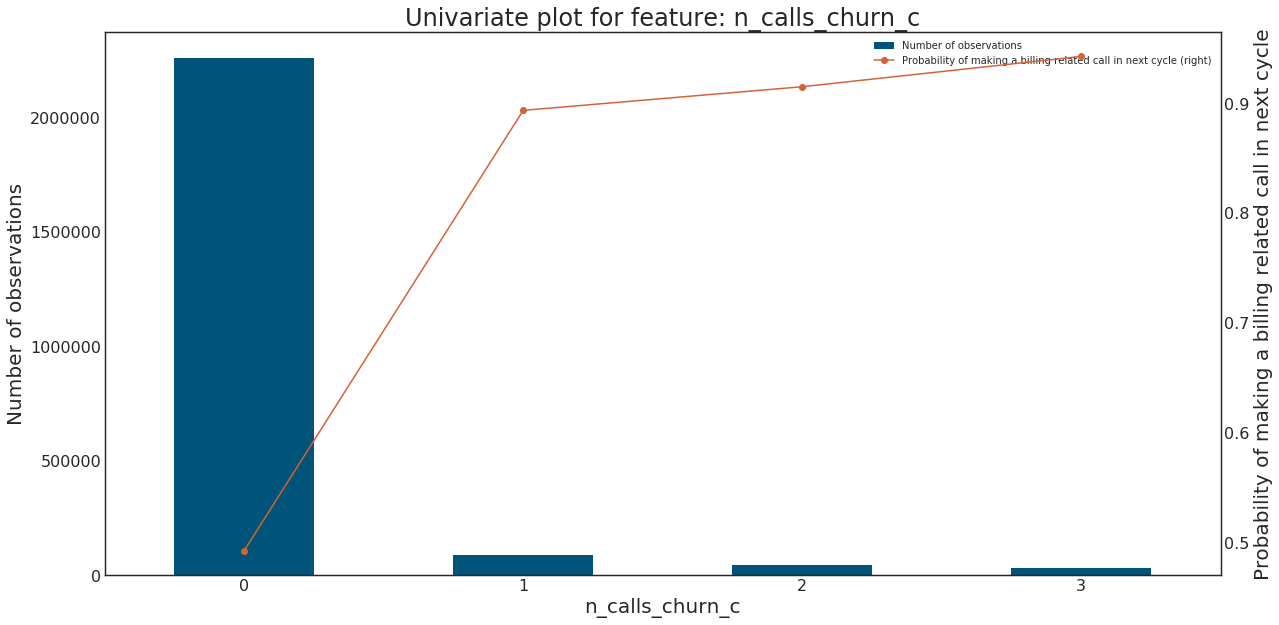

label         
                     mean    count
n_calls_churn_c                   
0                0.492906  2261532
1                0.893345    90216
2                0.914845    43004
3                0.942421    32807

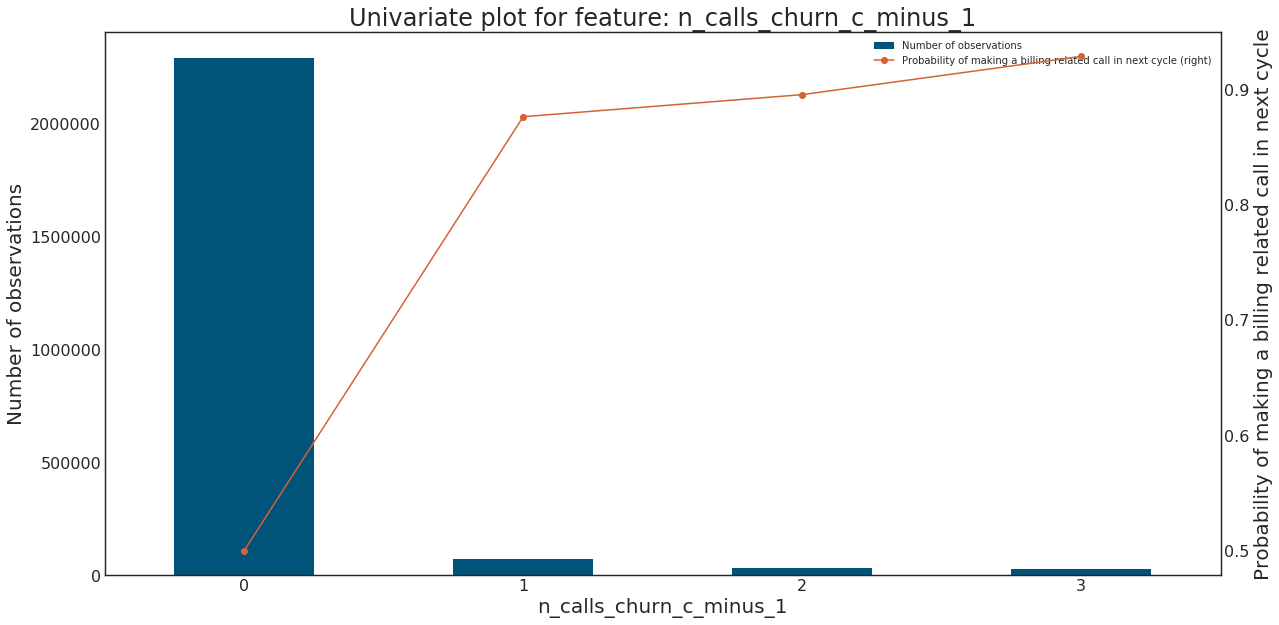

label         
                             mean    count
n_calls_churn_c_minus_1                   
0                        0.499602  2292953
1                        0.876489    74115
2                        0.895661    34244
3                        0.928868    26247

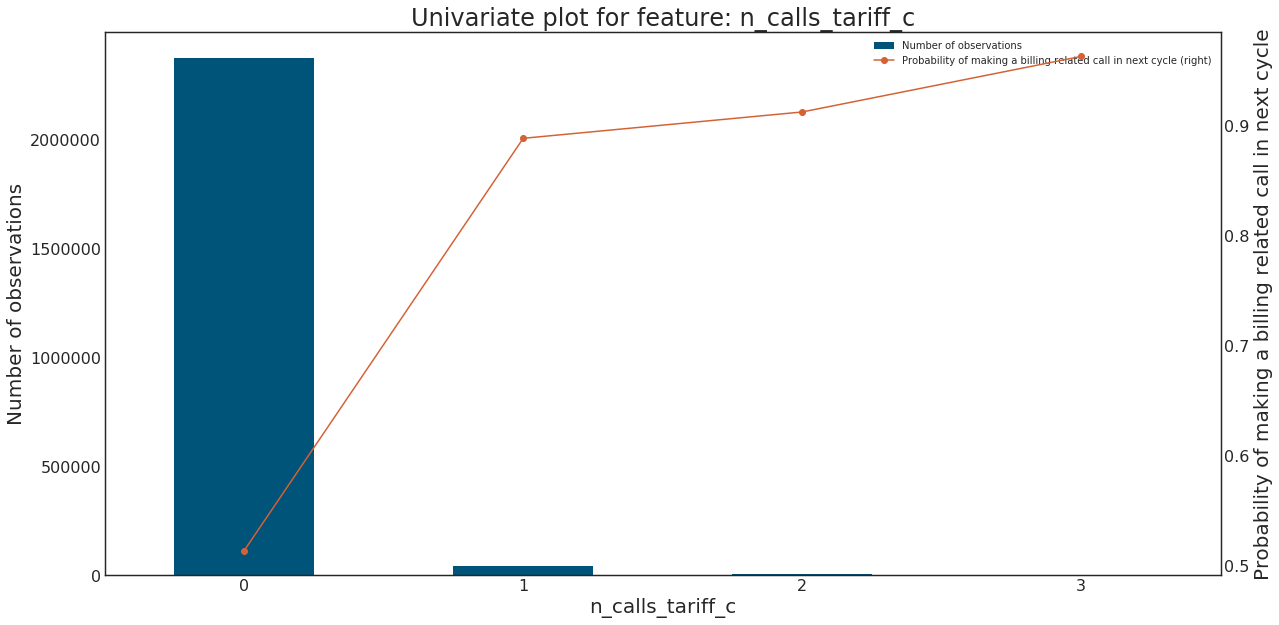

label         
                      mean    count
n_calls_tariff_c                   
0                 0.513360  2376761
1                 0.888653    41887
2                 0.912627     7199
3                 0.963201     1712

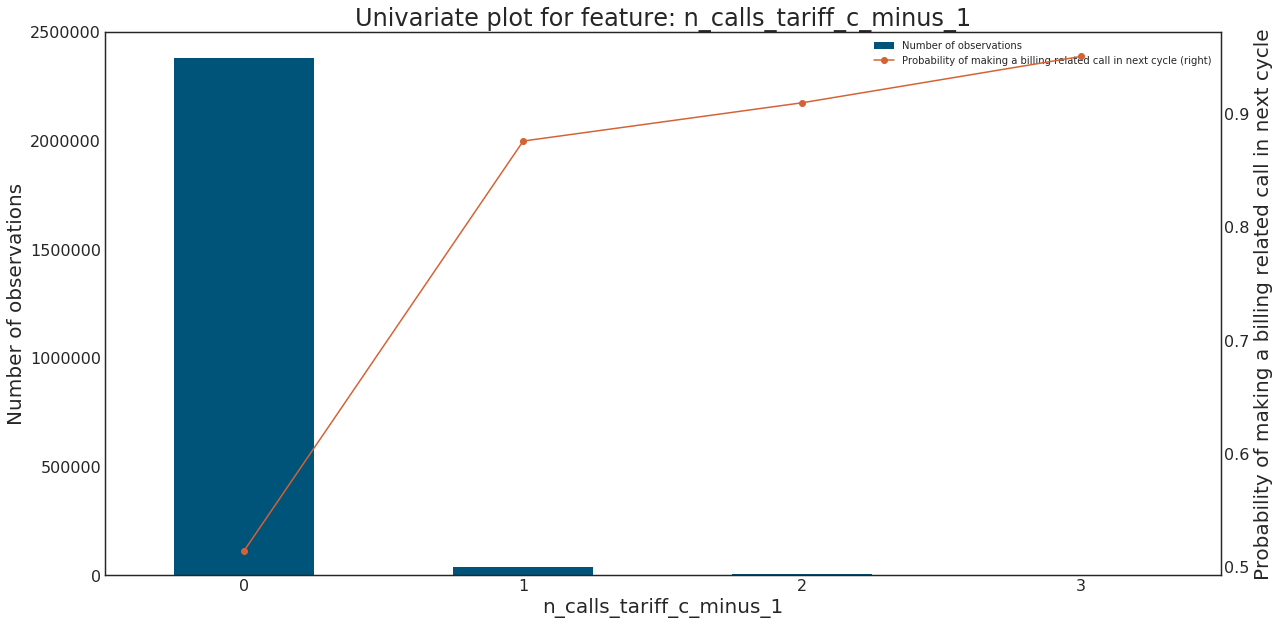

label         
                              mean    count
n_calls_tariff_c_minus_1                   
0                         0.514357  2381579
1                         0.875535    37874
2                         0.909284     6581
3                         0.950164     1525

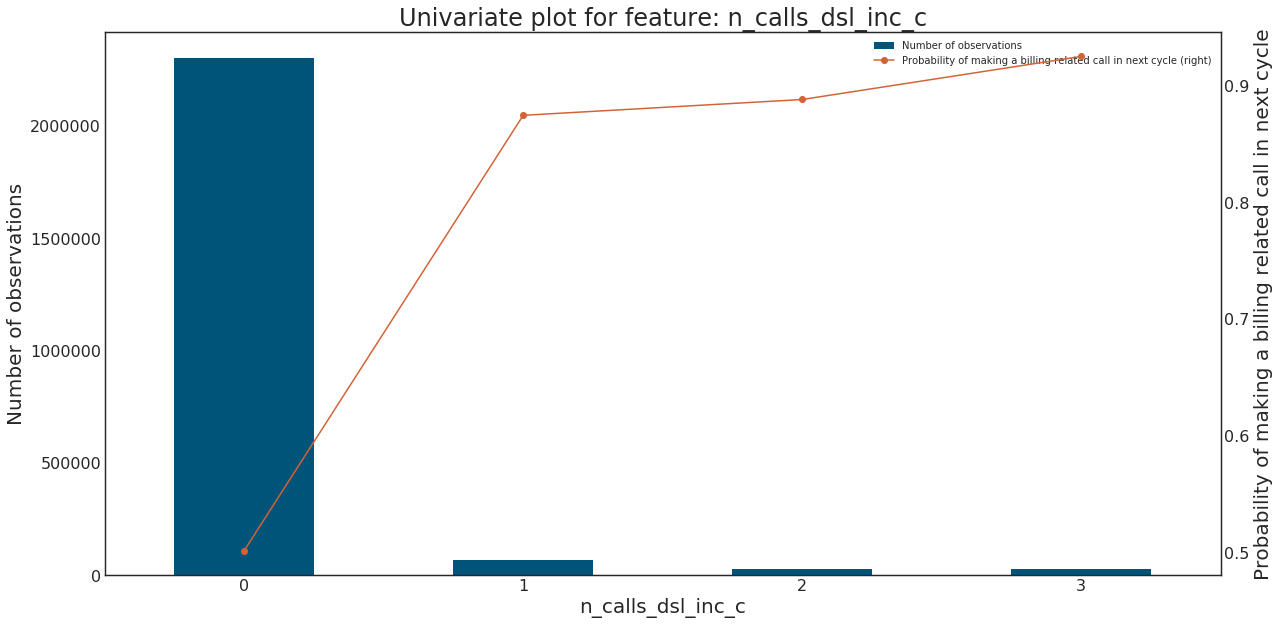

label         
                       mean    count
n_calls_dsl_inc_c                   
0                  0.501466  2302936
1                  0.874345    68473
2                  0.887892    28874
3                  0.924806    27276

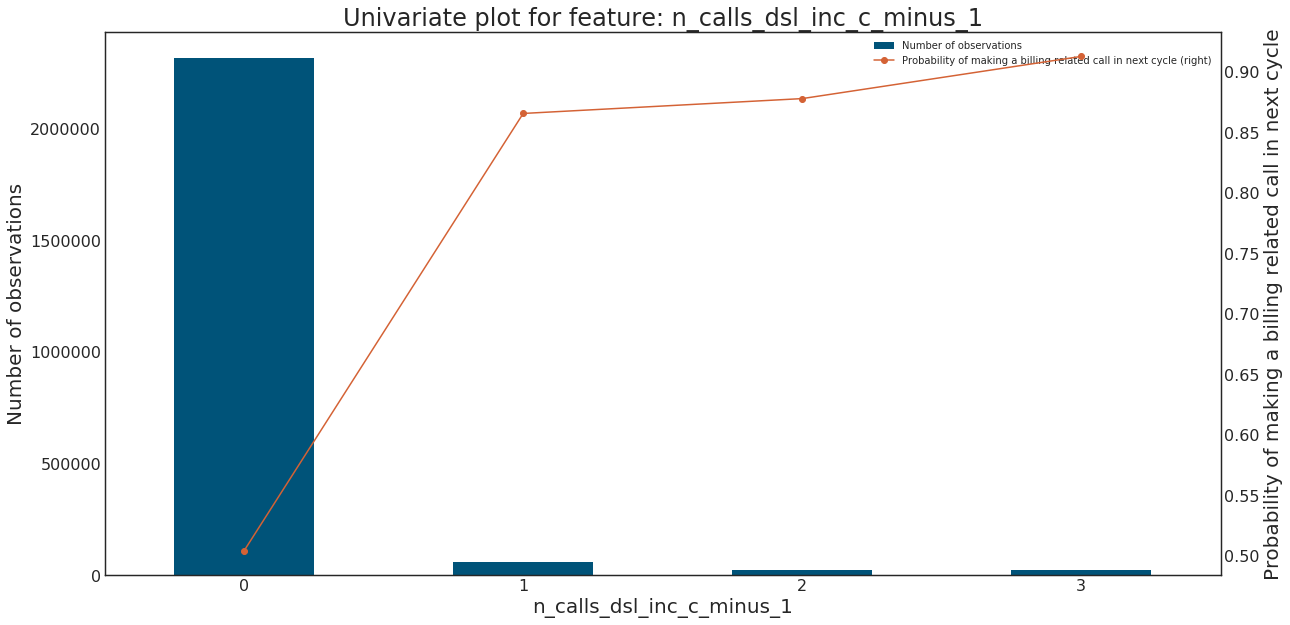

label         
                               mean    count
n_calls_dsl_inc_c_minus_1                   
0                          0.504457  2317889
1                          0.865522    61564
2                          0.877793    25465
3                          0.912636    22641

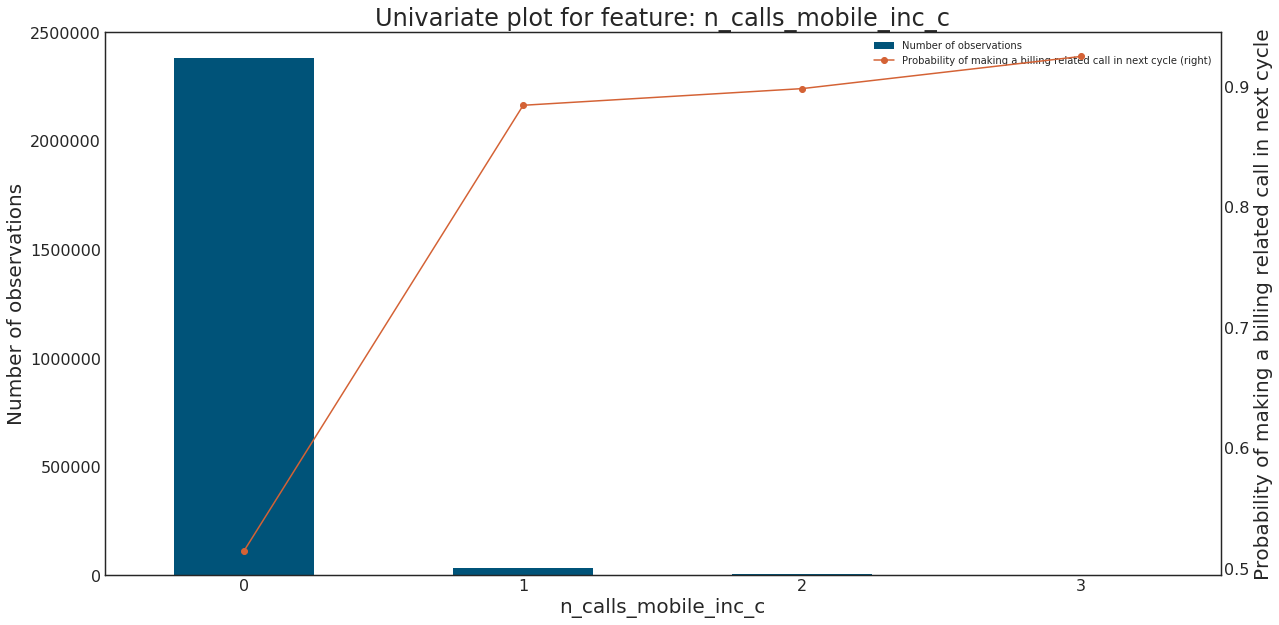

label         
                          mean    count
n_calls_mobile_inc_c                   
0                     0.514537  2383493
1                     0.884076    33686
2                     0.897904     7395
3                     0.924623     2985

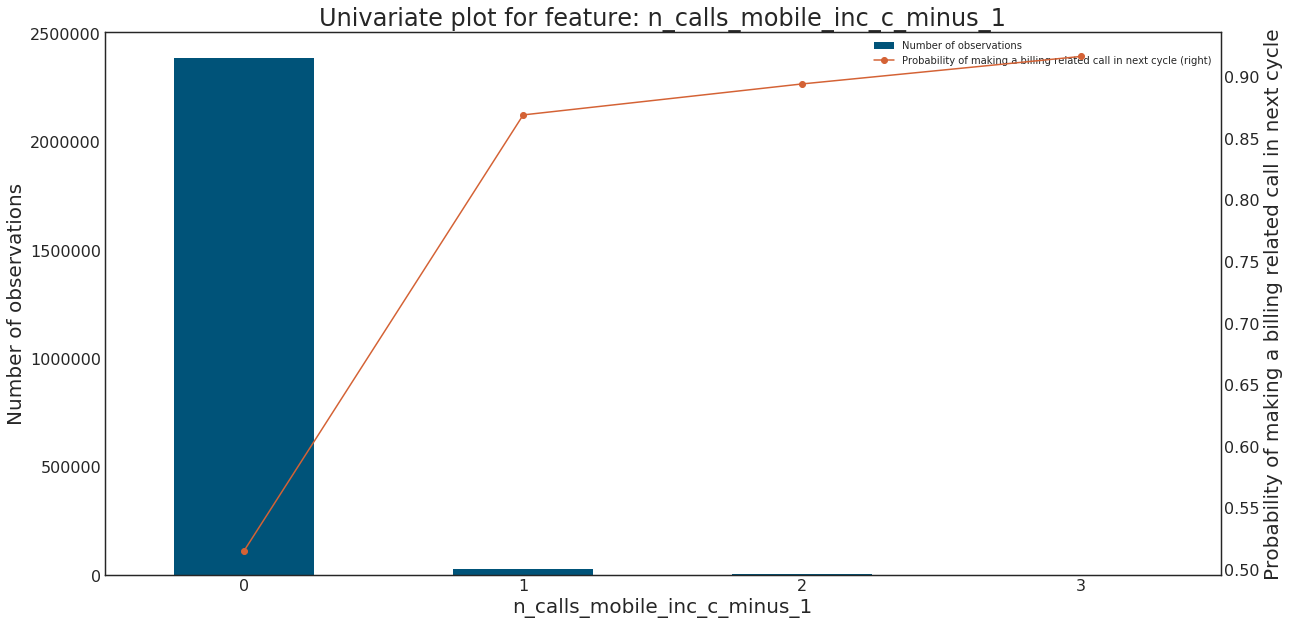

label         
                                  mean    count
n_calls_mobile_inc_c_minus_1                   
0                             0.515440  2387884
1                             0.868912    30369
2                             0.894055     6711
3                             0.916378     2595

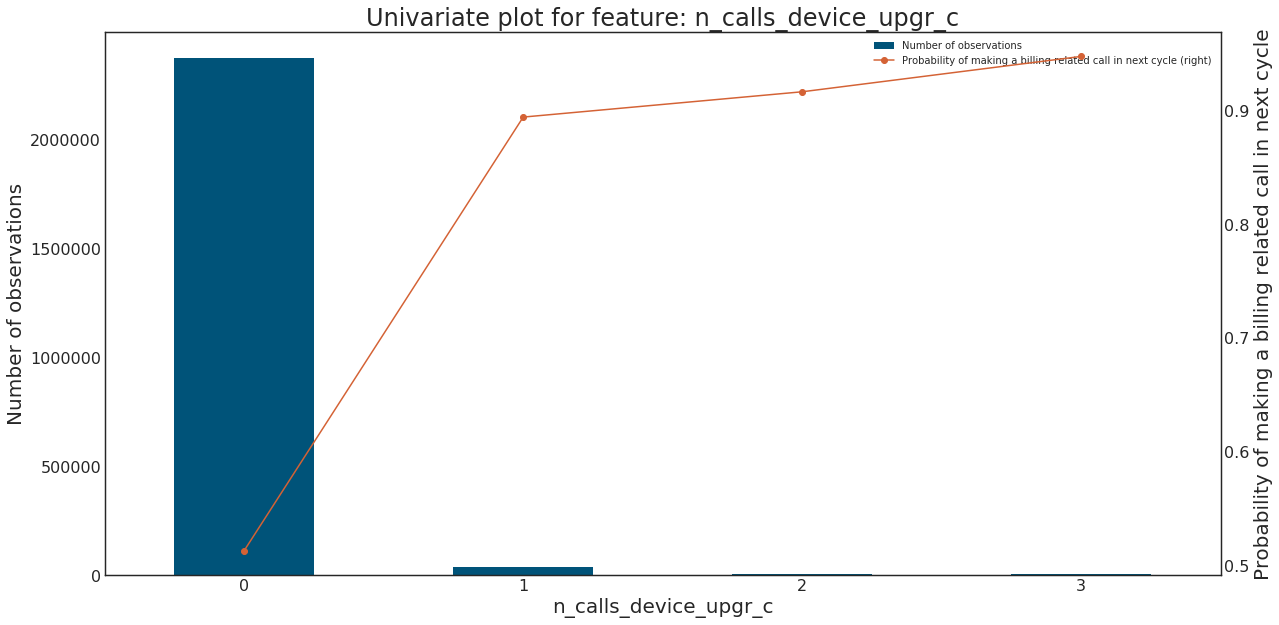

label         
                           mean    count
n_calls_device_upgr_c                   
0                      0.512819  2374540
1                      0.894115    39845
2                      0.916378     7785
3                      0.947486     5389

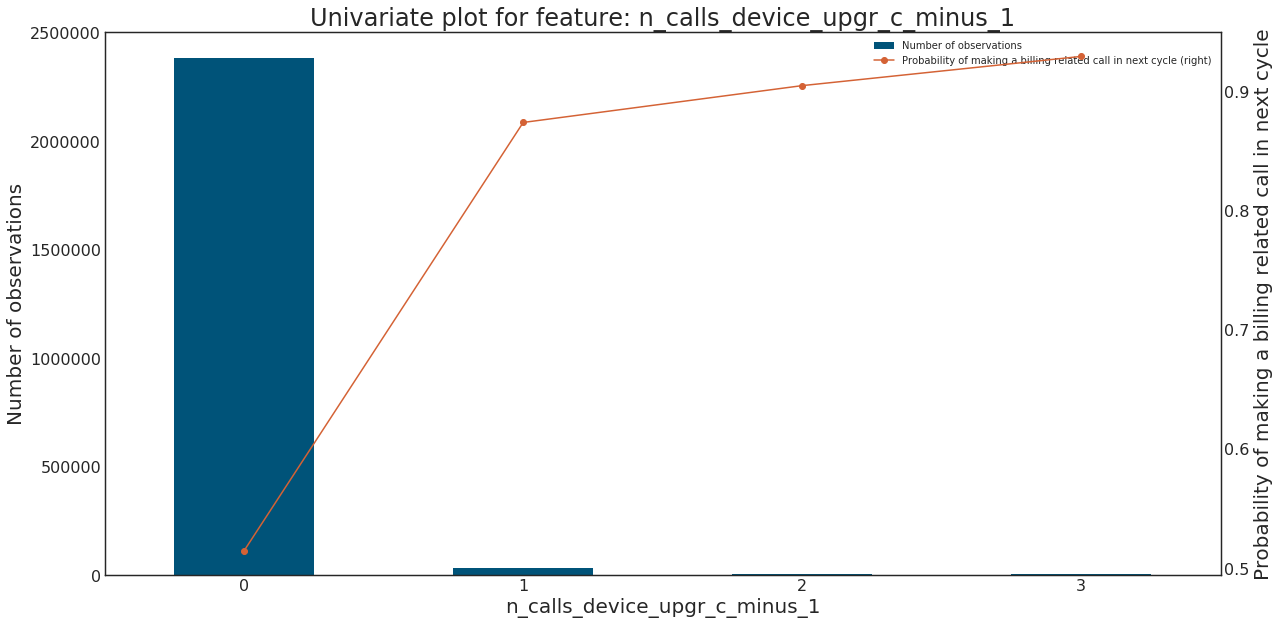

label         
                                   mean    count
n_calls_device_upgr_c_minus_1                   
0                              0.514767  2384327
1                              0.873938    32833
2                              0.904844     6379
3                              0.929353     4020

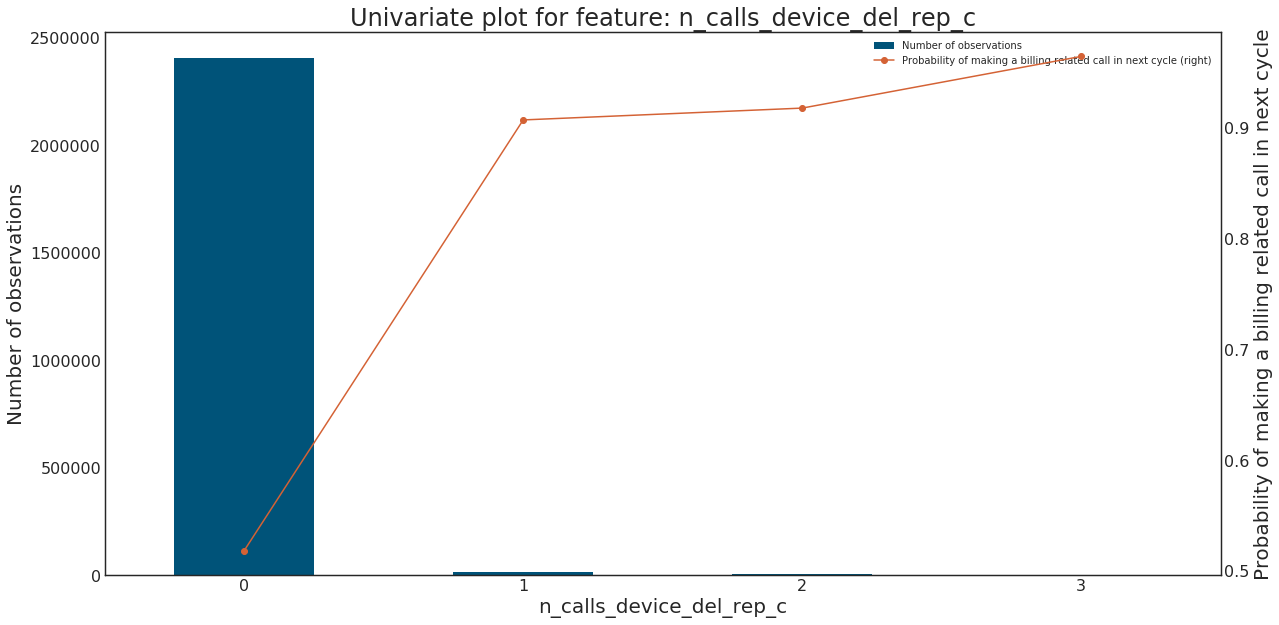

label         
                              mean    count
n_calls_device_del_rep_c                   
0                         0.518241  2408568
1                         0.906929    13581
2                         0.917613     3787
3                         0.964264     1623

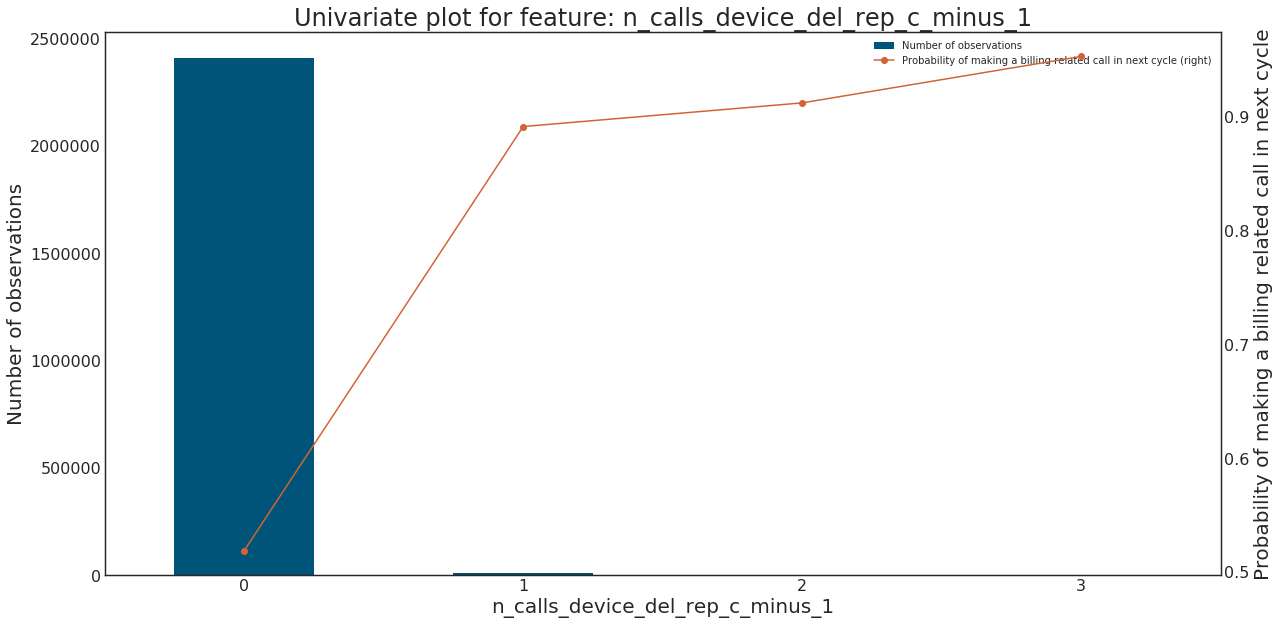

label         
                                      mean    count
n_calls_device_del_rep_c_minus_1                   
0                                 0.518743  2411043
1                                 0.891077    12137
2                                 0.911843     3006
3                                 0.952658     1373

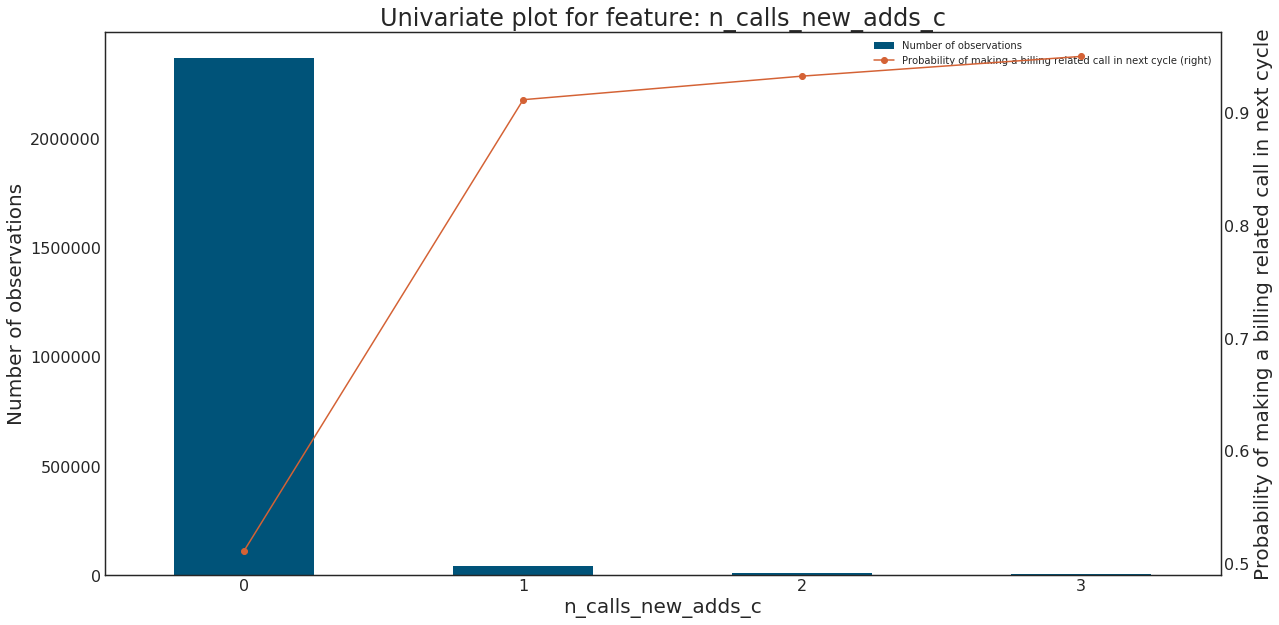

label         
                        mean    count
n_calls_new_adds_c                   
0                   0.511575  2369418
1                   0.911286    41324
2                   0.932176    10660
3                   0.949651     6157

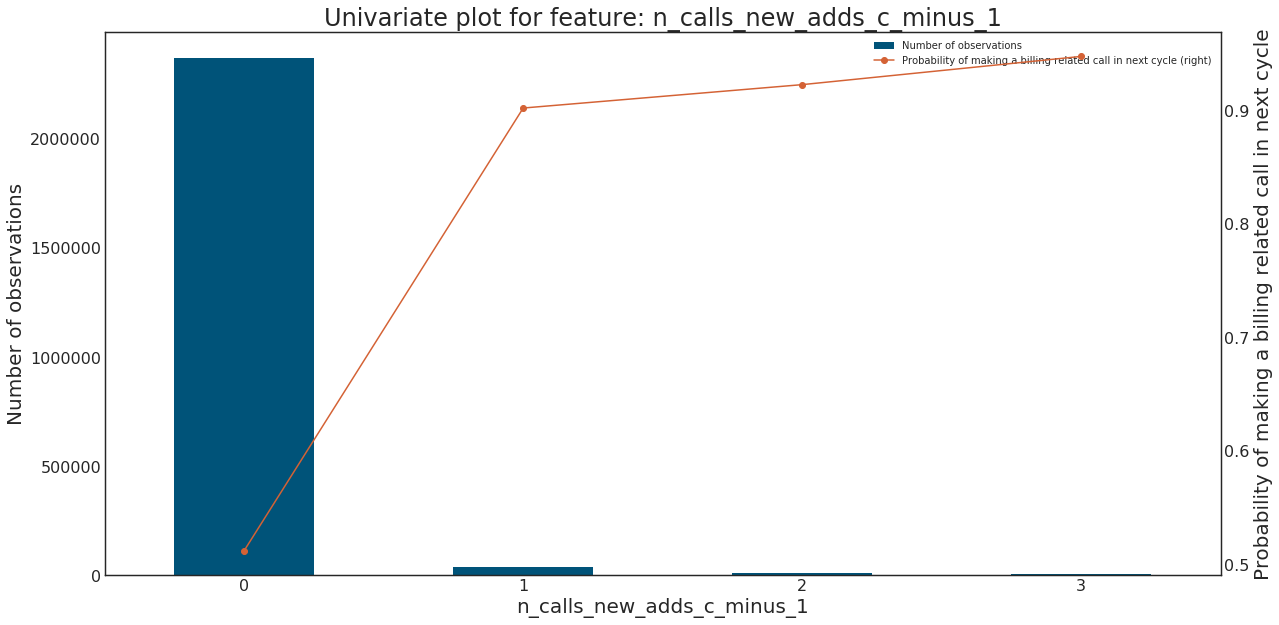

label         
                                mean    count
n_calls_new_adds_c_minus_1                   
0                           0.512304  2372466
1                           0.901751    39186
2                           0.922338    10095
3                           0.947178     5812

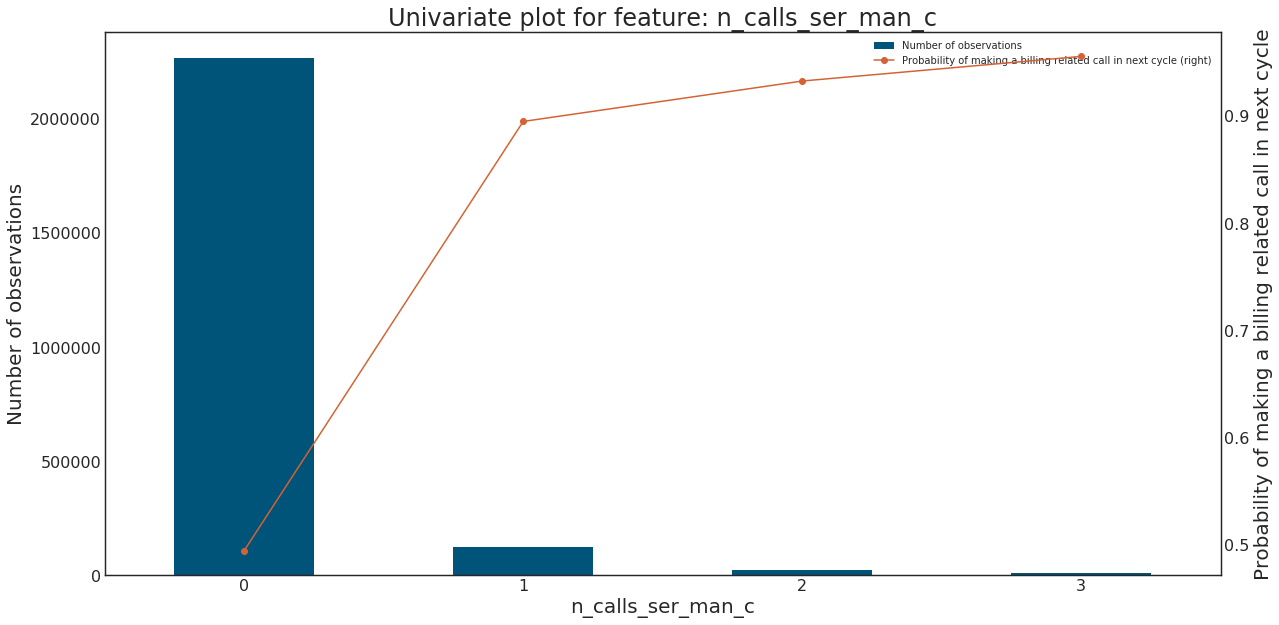

label         
                       mean    count
n_calls_ser_man_c                   
0                  0.494303  2267715
1                  0.894912   124867
2                  0.932646    23191
3                  0.955625    11786

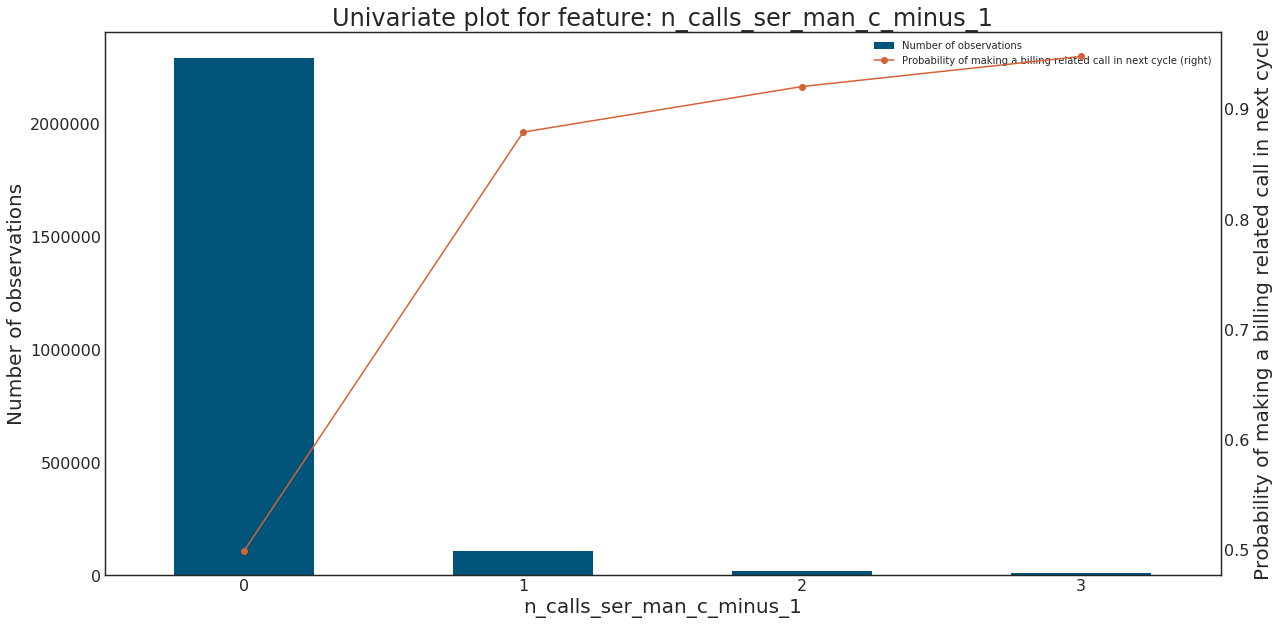

label         
                               mean    count
n_calls_ser_man_c_minus_1                   
0                          0.499326  2290825
1                          0.878986   106665
2                          0.920317    19929
3                          0.947633    10140

In [39]:
n_calls_variables = ['n_calls_billing_c', 'n_calls_billing_c_minus_1', 
                     'n_calls_churn_c', 'n_calls_churn_c_minus_1', 'n_calls_tariff_c', 'n_calls_tariff_c_minus_1', 
                     'n_calls_dsl_inc_c', 'n_calls_dsl_inc_c_minus_1', 'n_calls_mobile_inc_c', 
                     'n_calls_mobile_inc_c_minus_1', 'n_calls_device_upgr_c', 'n_calls_device_upgr_c_minus_1', 
                     'n_calls_device_del_rep_c', 'n_calls_device_del_rep_c_minus_1', 'n_calls_new_adds_c',
                     'n_calls_new_adds_c_minus_1', 'n_calls_ser_man_c', 'n_calls_ser_man_c_minus_1']

for call_var in n_calls_variables:
    df_calls = plot_univariate_ordinal(call_var, maximum=3)
    display(df_calls)

### Categorical features

#### Data plan

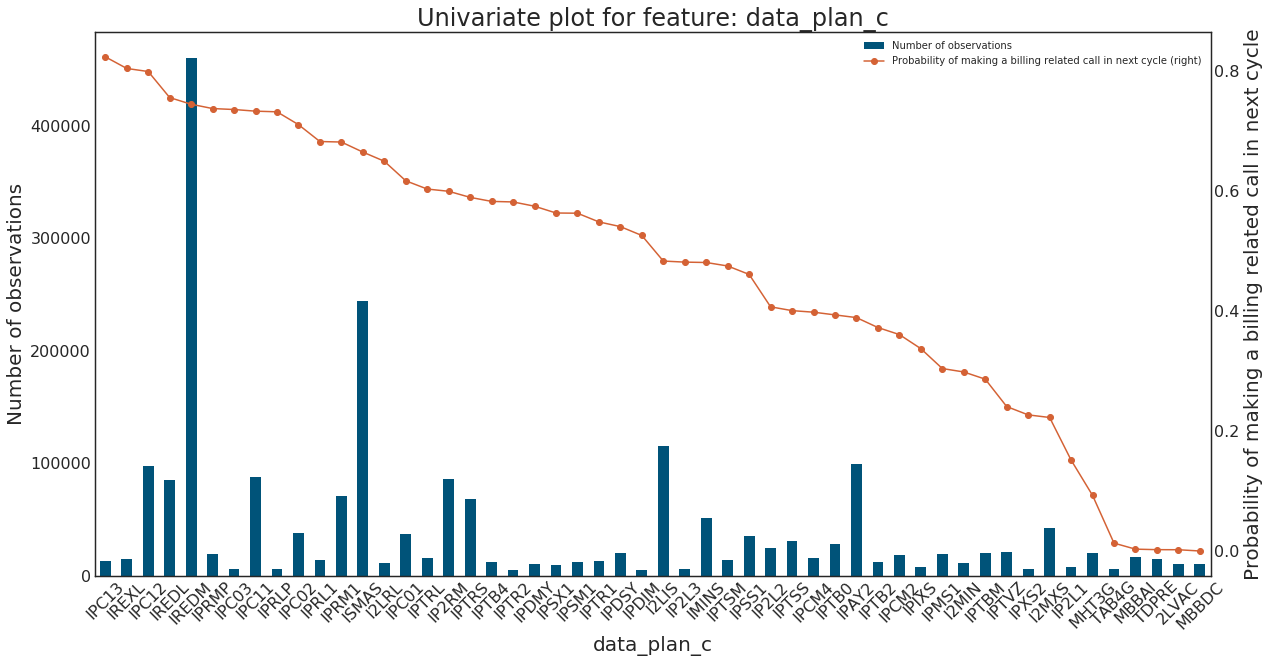

In [40]:
data_plan = plot_univariate_categorical('data_plan_c', min_samples=4000)

In [41]:
data_plan

label        
                 mean   count
data_plan_c                  
IPC13        0.822634   12883
IREXL        0.803252   14943
IPC12        0.798159   97641
IREDL        0.754806   84692
IREDM        0.743726  459996
IPRMP        0.736539   18925
IPC03        0.734930    6138
IPC11        0.732218   87560
IPRLP        0.731114    6367
IPC02        0.709791   37728
IPRL1        0.681666   14312
IPRM1        0.680832   70784
ISMAS        0.664119  244173
I2LRL        0.648868   11087
IPC01        0.616323   36721
IPTRL        0.602593   15732
IP2RM        0.598869   85735
IPTRS        0.588739   68127
IPTB4        0.582032   11843
IPTR2        0.581142    5515
IPDMY        0.574040   10231
IPSX1        0.562739    9157
IPSM1        0.562383   12335
IPTR1        0.547895   13112
IPDSY        0.540087   20543
IPDIM        0.525324    5094
I2LIS        0.482774  114944
IP2L3        0.481001    6395
IMINS        0.480365   51413
IPTSM        0.474560   13935
IPSS1        0.460521   35399
IP2L2        0.406588   24558
IPTSS        0.400276   30419
IPCM4        0.397673   15817
IPTB0        0.393177   28229
IPAY2        0.388667   99548
IPTB2        0.372128   12579
IPCM2        0.360445   18147
IPIXS        0.337007    7712
IPMS1        0.303904   19572
I2MIN        0.298201   10892
IPTBM        0.286232   20162
IPTVZ        0.240661   20693
IPXS2        0.226791    5569
I2MXS        0.222478   42611
IP2L1        0.151675    7793
MHT3G        0.092875   20296
TAB4G        0.013386    6275
MBBAI        0.003352   16707
TDPRE        0.002511   14738
2LVAC        0.002383   10489
MBBDC        0.000279   10751

#### Voice plan

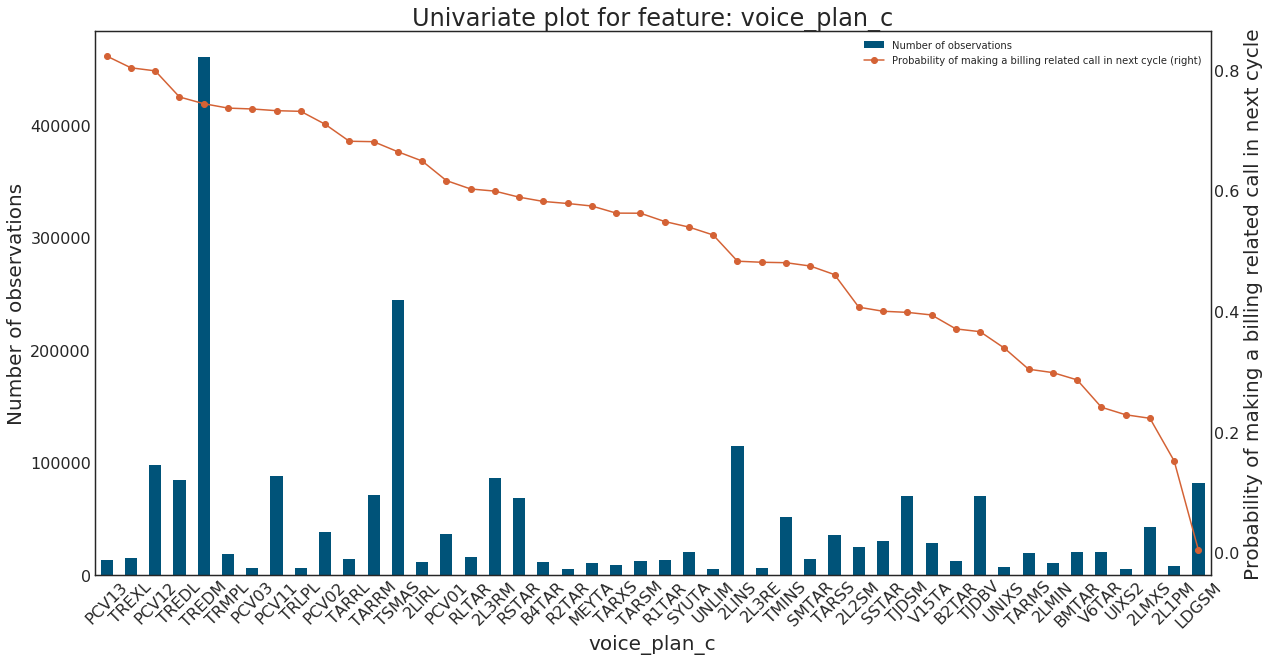

In [42]:
voice_plan = plot_univariate_categorical('voice_plan_c', min_samples=4000)

#### Promo code vf

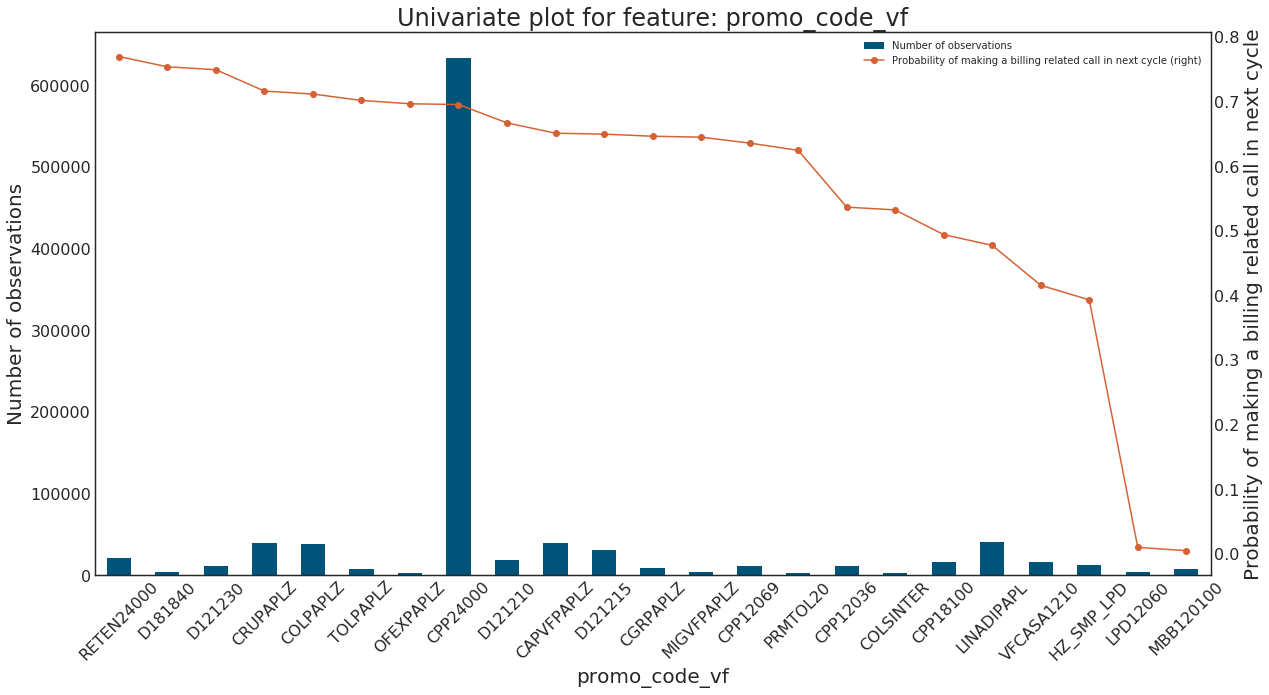

In [43]:
promo_code_vf = plot_univariate_categorical('promo_code_vf', min_samples=2000)

In [44]:
promo_code_vf

label        
                   mean   count
promo_code_vf                  
RETEN24000     0.769773   20697
D181840        0.753816    3603
D121230        0.749354   12005
CRUPAPLZ       0.716237   39688
COLPAPLZ       0.711655   38069
TOLPAPLZ       0.701784    8353
OFEXPAPLZ      0.696589    2785
CPP24000       0.695420  633739
D121210        0.667013   18295
CAPVFPAPLZ     0.651012   40116
D121215        0.649614   30475
CGRPAPLZ       0.646331    8966
MIGVFPAPLZ     0.644893    4562
CPP12069       0.635747   11643
PRMTOL20       0.624510    3313
CPP12036       0.536604   11843
COLSINTER      0.532220    2576
CPP18100       0.493969   16416
LINADIPAPL     0.477432   40854
VFCASA1210     0.415551   16809
HZ_SMP_LPD     0.392957   12579
LPD12060       0.009821    3971
MBB120100      0.004692    7885

#### Promo code tarif

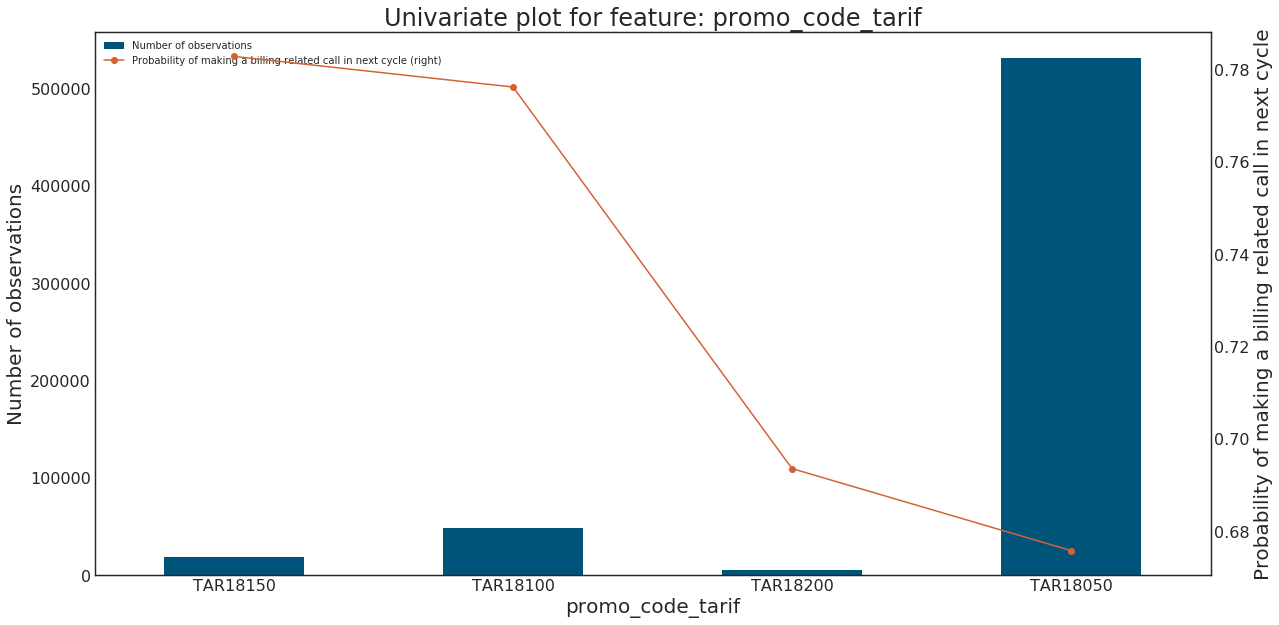

In [45]:
promo_code_tarif = plot_univariate_categorical('promo_code_tarif', min_samples=1000)

In [46]:
promo_code_tarif

label        
                      mean   count
promo_code_tarif                  
TAR18150          0.782785   18728
TAR18100          0.776154   49065
TAR18200          0.693540    5743
TAR18050          0.675789  531626

#### Zip code

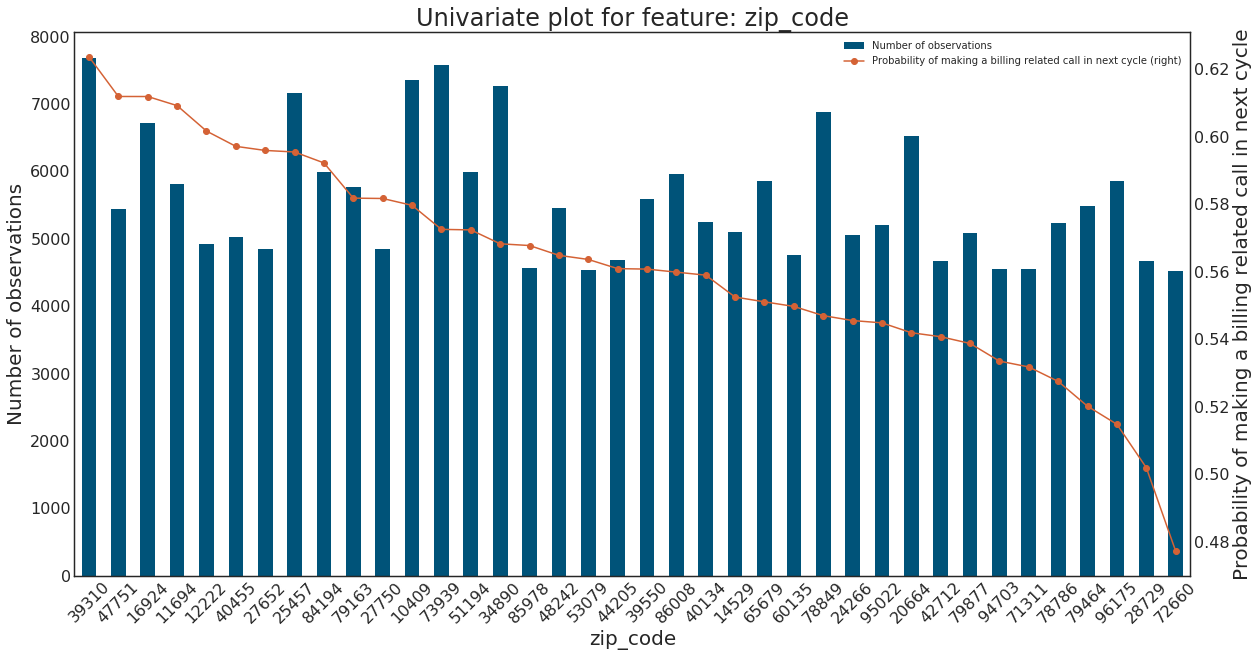

In [47]:
zip_code = plot_univariate_categorical('zip_code', min_samples=4500)

In [48]:
zip_code

label      
              mean count
zip_code                
39310     0.623715  7683
47751     0.611960  5435
16924     0.611947  6713
11694     0.609249  5817
12222     0.601707  4921
40455     0.597175  5027
27652     0.595960  4851
25457     0.595501  7157
84194     0.592259  5994
79163     0.581818  5775
27750     0.581717  4846
10409     0.579685  7354
73939     0.572560  7573
51194     0.572407  5987
34890     0.568282  7264
85978     0.567769  4567
48242     0.564859  5458
53079     0.563644  4533
44205     0.560923  4678
39550     0.560779  5594
86008     0.559879  5962
40134     0.558986  5247
14529     0.552487  5106
65679     0.551076  5854
60135     0.549716  4757
78849     0.546986  6885
24266     0.545527  5052
95022     0.544843  5207
20664     0.541916  6525
42712     0.540738  4664
79877     0.538734  5086
94703     0.533509  4551
71311     0.531765  4549
78786     0.527491  5238
79464     0.520124  5491
96175     0.514774  5855
28729     0.501929  4666
72660     0.477202  4518

#### Region code

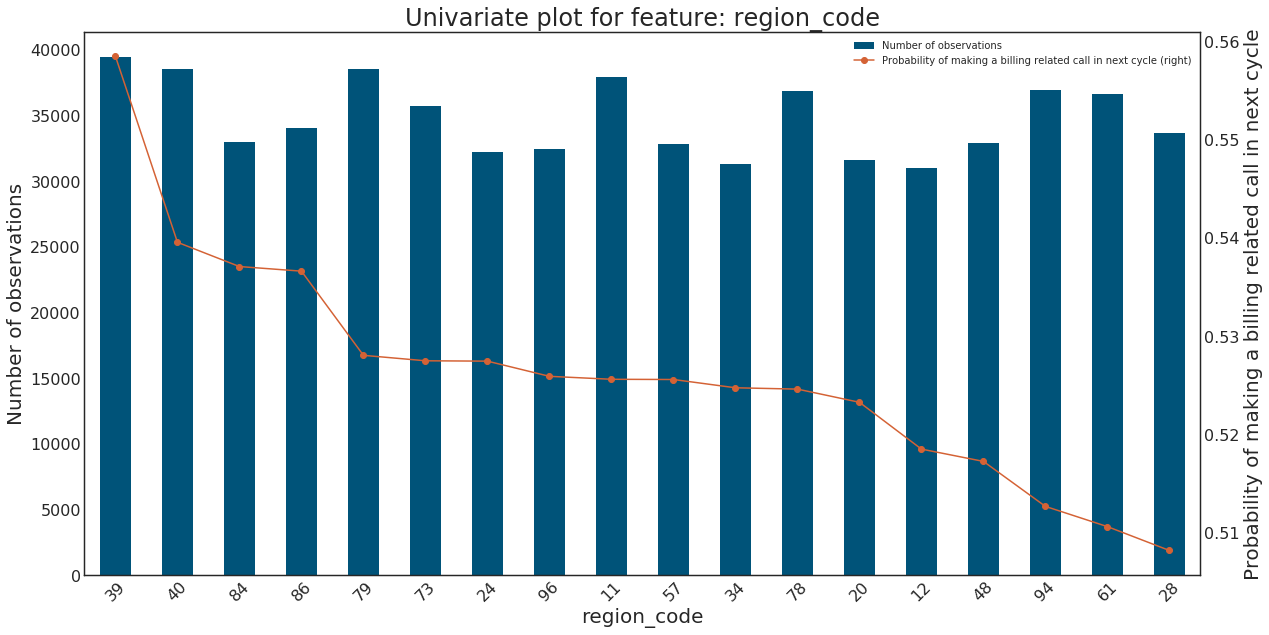

In [49]:
region_code = plot_univariate_categorical('region_code', min_samples=30000)

In [50]:
region_code

label       
                 mean  count
region_code                 
39           0.558505  39407
40           0.539550  38521
84           0.537079  32984
86           0.536610  34021
79           0.528031  38547
73           0.527475  35742
24           0.527438  32218
96           0.525891  32444
11           0.525590  37906
57           0.525567  32835
34           0.524724  31306
78           0.524587  36848
20           0.523245  31620
12           0.518473  30991
48           0.517220  32897
94           0.512635  36960
61           0.510574  36647
28           0.508142  33654

#### Gender

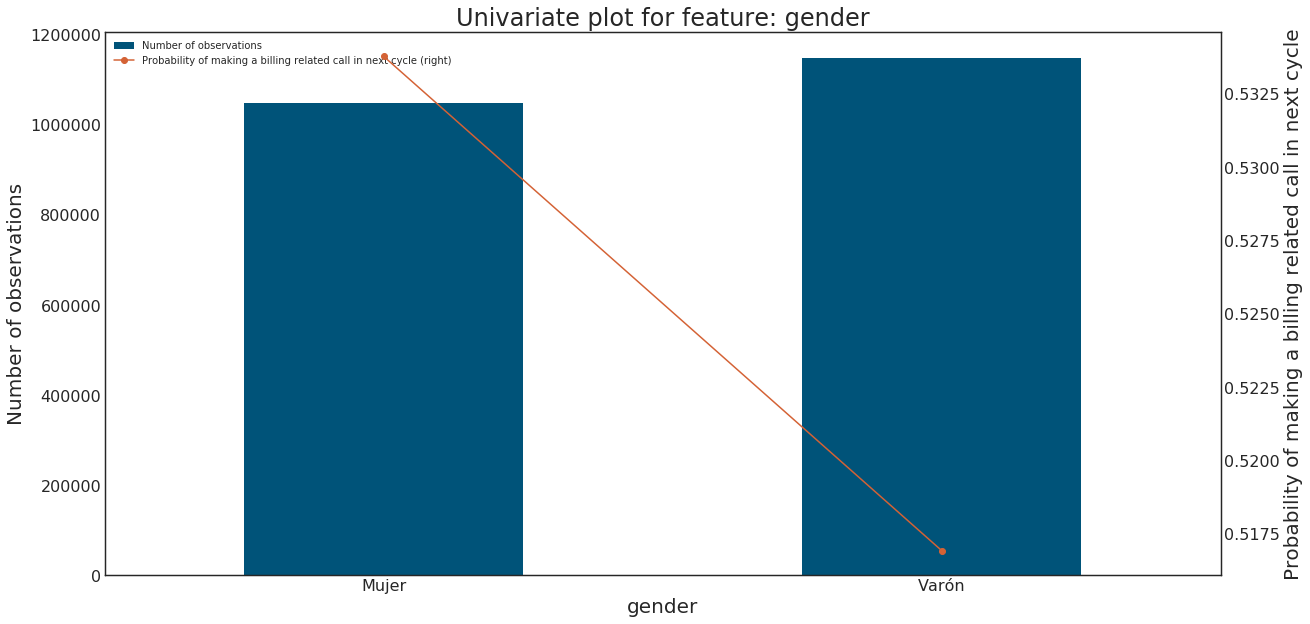

In [51]:
gender = plot_univariate_categorical('gender')

In [52]:
gender

label         
            mean    count
gender                   
Mujer   0.533779  1049285
Varón   0.516933  1149340

#### Type identity documen

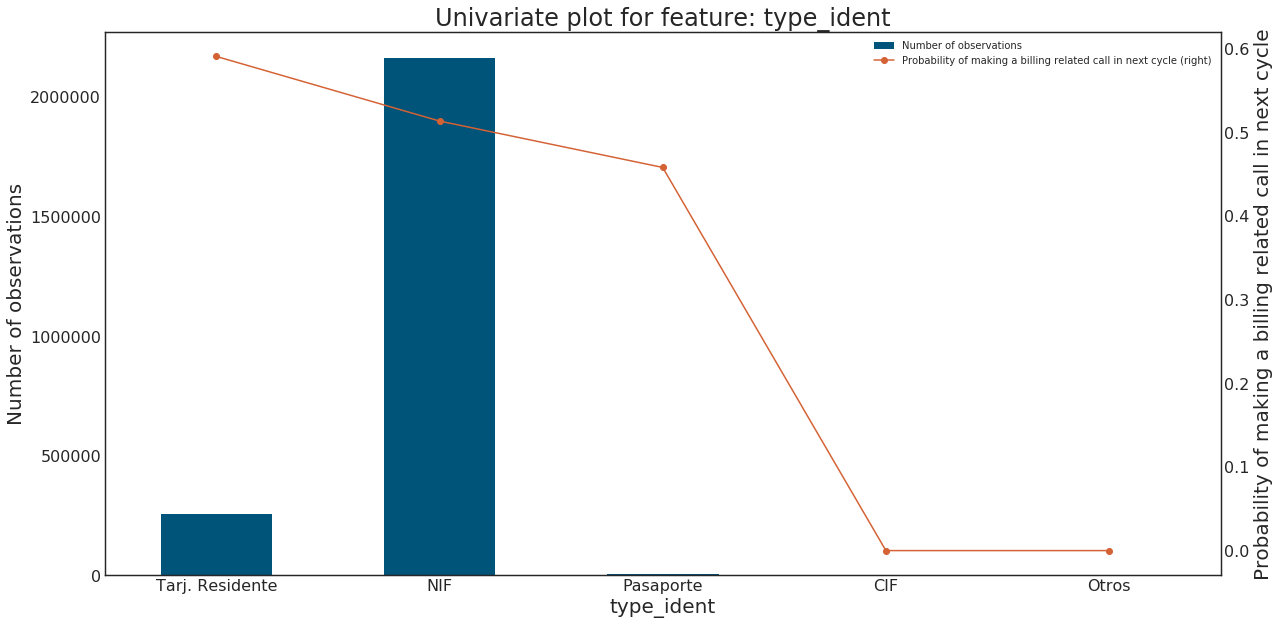

In [53]:
type_ident = plot_univariate_categorical('type_ident')

In [54]:
type_ident

label         
                     mean    count
type_ident                        
Tarj. Residente  0.590492   257548
NIF              0.513280  2164235
Pasaporte        0.457813     5760
CIF              0.000000        6
Otros            0.000000       10

#### Nationality

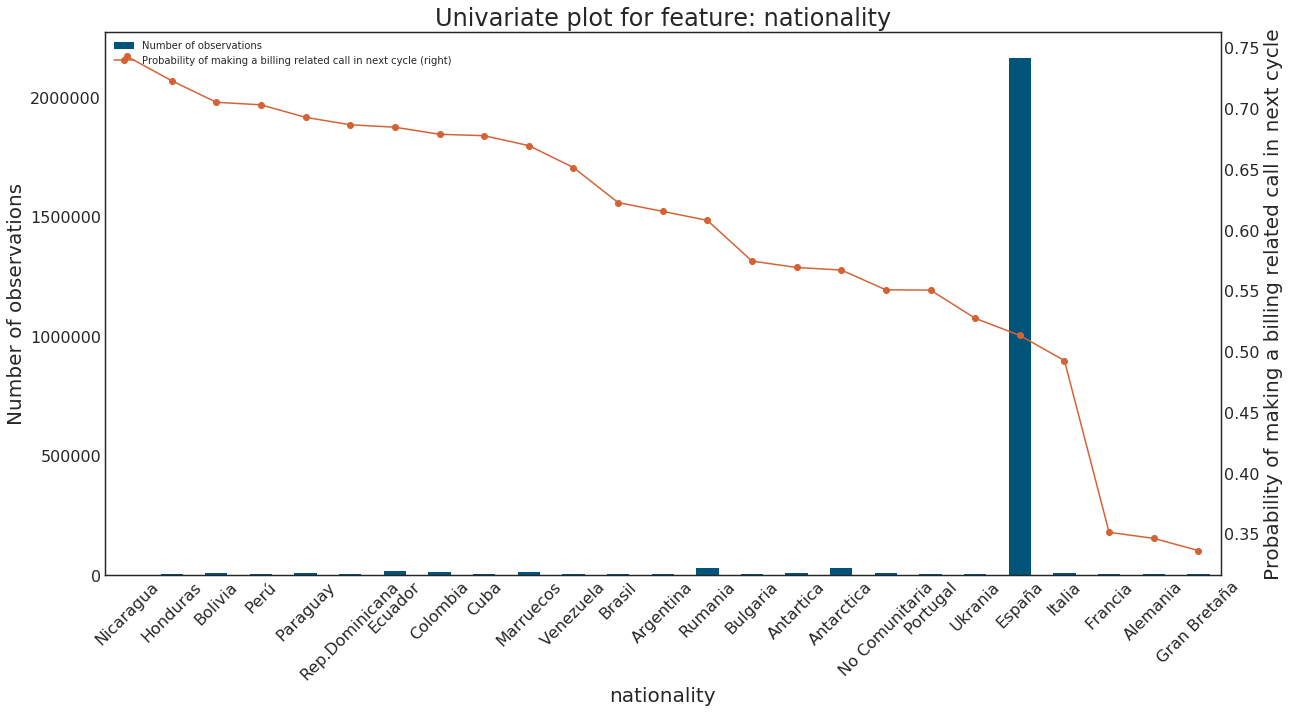

In [55]:
nationality = plot_univariate_categorical('nationality', min_samples=3000)

In [56]:
nationality

label         
                    mean    count
nationality                      
Nicaragua       0.742876     3053
Honduras        0.722828     4950
Bolivia         0.705111    11211
Perú            0.703019     7189
Paraguay        0.692726     9197
Rep.Dominicana  0.686610     5198
Ecuador         0.684603    16243
Colombia        0.678795    14374
Cuba            0.677625     4076
Marruecos       0.669460    12053
Venezuela       0.651431     6848
Brasil          0.622618     5615
Argentina       0.615371     5673
Rumania         0.607962    29140
Bulgaria        0.574457     5708
Antartica       0.569203     9819
Antarctica      0.567106    28589
No Comunitaria  0.550790     8230
Portugal        0.550586     5545
Ukrania         0.527379     3762
España          0.513310  2165068
Italia          0.492579    10713
Francia         0.351322     3706
Alemania        0.346341     4100
Gran Bretaña    0.336310     6158

### Numerical features

#### Age

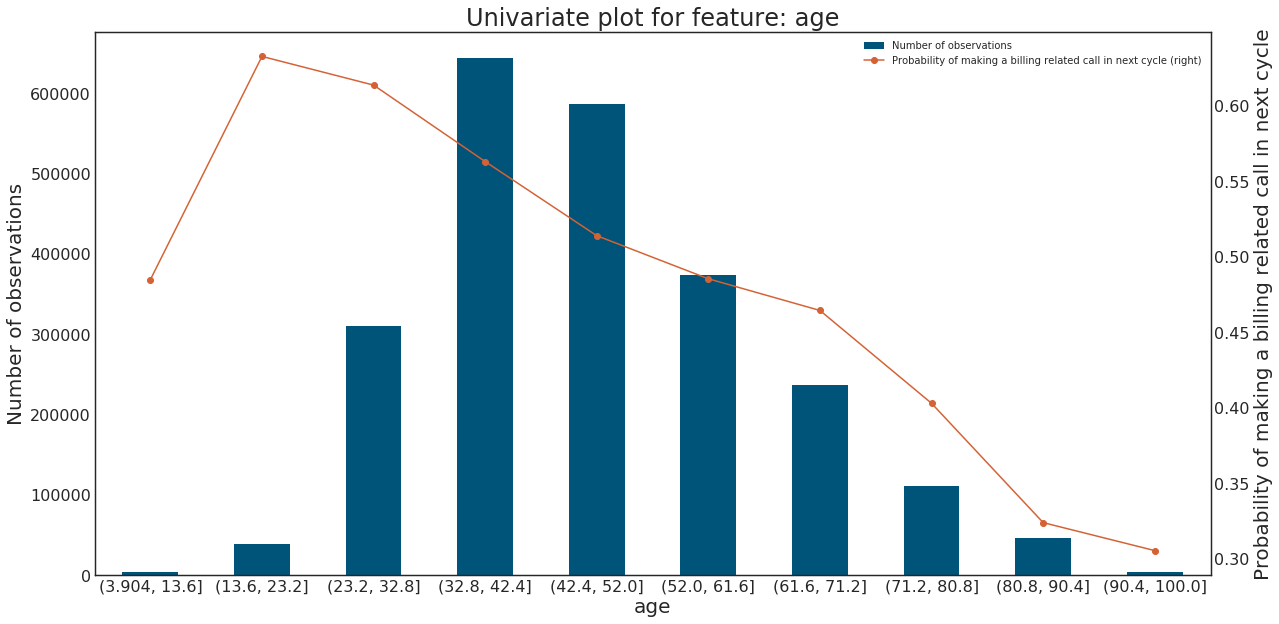

In [57]:
age = plot_univariate_numerical('age')

In [58]:
age

label        
                   mean   count
age                            
(3.904, 13.6]  0.484748    3606
(13.6, 23.2]   0.632482   39394
(23.2, 32.8]   0.613497  309876
(32.8, 42.4]   0.562890  644399
(42.4, 52.0]   0.513846  587071
(52.0, 61.6]   0.485312  373852
(61.6, 71.2]   0.464360  236838
(71.2, 80.8]   0.402918  111715
(80.8, 90.4]   0.323975   46124
(90.4, 100.0]  0.305467    4701